In [44]:
import sys
sys.path.append('.')

from bertopic.representation import KeyBERTInspired, VisualRepresentation
from bertopic.backend import MultiModalBackend
from bertopic import BERTopic
from PIL import Image
import os
import base64
from io import BytesIO
from IPython.display import HTML
from pathlib import Path
from torchvision import transforms
import torch
import pandas as pd
# sys.path.append(str(Path(os.path.abspath(__file__)).parent.parent.parent))

# from src.utils import preprocessing

# import thumbnails

# from experiments.config import global_config



In [45]:
# Image embedding model
embedding_model = MultiModalBackend('clip-ViT-B-32', batch_size=32)

# # Image to text representation model
# representation_model = {
#     "Visual_Aspect": VisualRepresentation(image_to_text_model="nlpconnect/vit-gpt2-image-captioning")
# }

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [27]:
# # images
# root_data = str(Path().resolve() / ".." / ".." / "data" / "training")

# # images_path = os.path.join(root_data, 'V9/annotated/asphalt/bad')
# # images_path = os.path.join(root_data, 'seg_analysis/original/not_recognizable/multi/streets')
# images_path = os.path.join(root_data, 'V11/scene_cropped')
# images = []
# for root, _, fnames in sorted(os.walk(images_path, followlinks=True)):
#     for fname in sorted(fnames):
#         path = os.path.join(root, fname)
#         if fname.endswith((".jpg", ".jpeg", ".png")):
#             images.append(path)

# print(images[:5])

[]


In [4]:
# partial_labels = {'115613061245645': 'bikelane on sidewalk',
#                   '147530060597553': 'biklane on street',
#                   '152436594516951': 'bikelane on sidewalk',
#                   '161779362788691': 'bikelane on sidewalk',
#                   '314600876906279': 'biklane on street',
#                   '324264732453909': 'bikelane on sidewalk',
#                   '332779451733060': 'bikelane on sidewalk',
#                   '371383354168821': 'biklane on street',
#                   '406638231063174': 'bikelane on sidewalk',
#                   '476023756839183': 'bikelane on sidewalk',
#                   '485652966084685': 'bikelane on sidewalk',
#                   '527494424951466': 'biklane on street',
#                   '586506369409581': 'biklane on street',
#                   '645723314281364': 'biklane on street',
#                   }
# labels_categories = ['bikelane on sidewalk', 'biklane on street']
# def labels_index(label):
#     class_to_idx = {labels_categories[i]: i for i in range(len(labels_categories))}
#     return -1 if label not in class_to_idx.keys() else class_to_idx[label]

In [5]:
# # for guided topic modeling only
# seed_topic_list = [["bikelane on road"],
#                    ["bikelane on sidewalk"],
#                    ["driving"]]
# # for zero-shot modeling only
# zeroshot_topic_list = ["bikelane on road", "bikelane on sidewalk"]
# # for semi-supervised modeling only
# ids = [os.path.splitext(os.path.split(path)[-1])[0] for path in images]
# labels = [partial_labels.get(id, 'no label') for id in ids]
# y = [labels_index(label) for label in labels]


In [6]:
# # transform images
# images = [Image.open(img) for img in images]
# # lower half
# # images = [transforms.functional.crop(img, 0.5*img.size[1], 0, 0.5*img.size[1], img.size[0]) for img in images]

# images[0]

IndexError: list index out of range

In [ ]:
# # standard
# topic_model = BERTopic(embedding_model=embedding_model,
#                        representation_model=representation_model,
#                        min_topic_size=5)
# topics, probs = topic_model.fit_transform(documents=None, images=images)
# # # guided topic modeling
# # topic_model = BERTopic(embedding_model=embedding_model,
# #                        representation_model=representation_model,
# #                        min_topic_size=5,
# #                        seed_topic_list=seed_topic_list)
# # topics, probs = topic_model.fit_transform(documents=None, images=images)
# # # zero-shot topic modeling
# # topic_model = BERTopic(embedding_model=embedding_model,
# #                        representation_model=representation_model,
# #                     #    min_topic_size=5,
# #                        zeroshot_topic_list=zeroshot_topic_list,
# #                        zeroshot_min_similarity=0.7,)
# # topics, probs = topic_model.fit_transform(documents=None, images=images)
# # # semi-supervised topic modeling
# # topic_model = BERTopic(embedding_model=embedding_model,
# #                        representation_model=representation_model,
# #                        min_topic_size=5)
# # topics, probs = topic_model.fit_transform(documents=None,
# #                                           images=images,
# #                                           y=y)

# print(topics)
# print(probs)

In [ ]:
# print([id for i, id in enumerate(ids) if labels[i] != 'no label'])
# print([labels[i] for i, _ in enumerate(ids) if labels[i] != 'no label'])
# print([topic for i, topic in enumerate(topics) if labels[i] != 'no label'])

In [46]:
def image_base64(im):
    if isinstance(im, str):
        # im = get_thumbnail(im)
        print("is string")
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()


def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [6]:
# topic_model.get_topic_info()

NameError: name 'topic_model' is not defined

In [ ]:
# df = topic_model.get_topic_info().drop("Representative_Docs", axis=1).drop("Name", axis=1)

# # Visualize the images
# HTML(df.to_html(formatters={'Visual_Aspect': image_formatter}, escape=False))

In [ ]:
# topic_model.visualize_topics()

In [ ]:
# df["Visual_Aspect"][0].show()

In [ ]:
# topic_model.get_topic(-1)

In [ ]:
# topic_model.get_params()

In [ ]:
# topic_model.topic_embeddings_.shape

In [ ]:
# topic_model.visualize_heatmap()

In [107]:
model_root = str(Path().resolve() / ".." / ".." / "trained_models")

# # V9/annotated
# model_name = "bertopic-20240507_132231"
# # V11/scene_cropped
# model_name = "bertopic-20240508_103554"
# V11/annotated clip embeddings (scene_cropped)
# model_name = "bertopic-20240508_104513"
# V11/annotated clip embeddings (scene_cropped), cluster_selection = 'leaf'
# model_name = "bertopic-20240508_104513"
# V11/annotated clip embeddings (scene_cropped), cluster_selection = 'leaf', nr_topics = 'auto'
# model_name = "bertopic-20240508_135032"
# V11/annotated dino embeddings (scene_cropped), cluster_selection = 'eom'
model_name = "bertopic-20240513_172254"
# V11/annotated dino embeddings (scene_cropped), cluster_selection = 'leaf'
# model_name = "bertopic-20240513_172638"
# V11/annotated effnet features embeddings (scene_cropped), cluster_selection = 'eom'
# model_name = "bertopic-20240515_123441"
# V11/annotated effnet features embeddings (scene_cropped), cluster_selection = 'leaf'
# model_name = "bertopic-20240515_123656"
# V11/annotated effnet layer 5 embeddings (scene_cropped), cluster_selection = 'eom'
# model_name = "bertopic-20240516_110436"
# V11/annotated effnet layer 5 embeddings (scene_cropped), cluster_selection = 'leaf'
# model_name = "bertopic-20240516_110729"
# V11/annotated effnet_v2_s features embeddings (scene_cropped), cluster_selection = 'eom'
# model_name = "bertopic-20240516_111333"
# V11/annotated effnet_v2_s features embeddings (scene_cropped), cluster_selection = 'leaf'
# model_name = "bertopic-20240516_111745"

# V11/annotated clip embeddings (scene_cropped), cluster_selection = 'eom', semi-supervised
# model_name = "bertopic-20240515_213258"
# V11/annotated clip embeddings (scene_cropped), cluster_selection = 'leaf', semi-supervised
# model_name = "bertopic-20240515_212631"
# V11/annotated effnet features embeddings (scene_cropped), cluster_selection = 'eom', semi-supervised
model_name = "bertopic-20240516_095915"
# V11/annotated effnet features embeddings (scene_cropped), cluster_selection = 'leaf', semi-supervised
# model_name = "bertopic-20240516_100116"
# V11/annotated effnet layer 5 embeddings (scene_cropped), cluster_selection = 'eom', semi-supervised
# model_name = "bertopic-20240516_112504"
# V11/annotated effnet layer 5 embeddings (scene_cropped), cluster_selection = 'leaf', semi-supervised
# model_name = "bertopic-20240516_113047"
# V11/annotated effnet_v2_s features embeddings (scene_cropped), cluster_selection = 'eom', semi-supervised
# model_name = "bertopic-20240516_113839"
# V11/annotated effnet_v2_s features embeddings (scene_cropped), cluster_selection = 'leaf', semi-supervised
# model_name = "bertopic-20240516_114224"


model_path = os.path.join(model_root, model_name)
print(model_path)

/Users/edith/git/SurfaceAI/classification_models/src/utils/../../trained_models/bertopic-20240516_095915


In [108]:
loaded_topic_model = BERTopic.load(model_path, embedding_model=embedding_model)

In [109]:
print(loaded_topic_model)

BERTopic(calculate_probabilities=False, ctfidf_model=ClassTfidfTransformer(...), embedding_model=<bertopic.backend._multimodal.MultiModalBackend object at 0x13dbdba00>, hdbscan_model=<bertopic.cluster._base.BaseCluster object at 0x138ffd810>, language=None, low_memory=False, min_topic_size=10, n_gram_range=(1, 1), nr_topics=None, representation_model=None, seed_topic_list=None, top_n_words=10, umap_model=<bertopic.dimensionality._base.BaseDimensionalityReduction object at 0x13def99f0>, vectorizer_model=CountVectorizer(...), verbose=False, zeroshot_min_similarity=0.7, zeroshot_topic_list=None)


In [110]:
loaded_topic_model.get_topic_info()

Topic  Count                              Name  \
0      -1   2138               -1_past_bus_next_to   
1       0   1656         0_sidewalk_bus_brick_wall   
2       1   1635          1_brick_parked_wall_side   
3       2   1211          2_dirt_trail_trees_woods   
4       3    821        3_parked_bird_people_bikes   
5       4    561           4_weeds_cat_bushes_road   
6       5    462  5_parked_motorcycles_side_filled   
7       6    246              6_truck_next_to_lots   
8       7    218            7_street_sign_it_signs   
9       8    213       8_fence_skateboard_red_post   
10      9    210   9_highway_tall_traffic_building   
11     10     95     10_highway_amount_traffic_lot   
12     11     75       11_daytime_are_driving_down   
13     12     62       12_stone_wall_fence_walking   
14     13     50        13_view_driving_down_other   
15     14     39         14_trucks_shown_behind_is   
16     15     37           15_traffic_lot_few_snow   
17     16     32     16_fence_sidewalk_river_bench   
18     17     28    17_blurry_truck_statue_giraffe   
19     18     27            18_bike_street_it_sign   
20     19     23        19_window_red_driving_view   
21     20     22          20_tree_that_grass_lined   
22     21     20     21_suitcase_black_sitting_the   
23     22     18         22_sign_sidewalk_pole_and   
24     23     15     23_yellow_motorcycle_hood_dog   
25     24     15           24_lot_driving_car_down   
26     25     14      25_train_station_tracks_near   
27     26     14       26_white_front_parked_black   
28     27     13         27_trees_driving_down_car   
29     28     10   28_cars_street_couple_buildings   

                                       Representation  \
0   [past, bus, next, to, street, down, bunch, it,...   
1   [sidewalk, bus, brick, wall, parked, bicycles,...   
2   [brick, parked, wall, side, sidewalk, the, on,...   
3   [dirt, trail, trees, woods, running, through, ...   
4   [parked, bird, people, bikes, white, van, side...   
5   [weeds, cat, bushes, road, sign, bunch, fence,...   
6   [parked, motorcycles, side, filled, the, parki...   
7   [truck, next, to, lots, street, cars, forest, ...   
8   [street, sign, it, signs, on, with, bike, road...   
9   [fence, skateboard, red, post, concrete, bars,...   
10  [highway, tall, traffic, building, past, lot, ...   
11  [highway, amount, traffic, lot, large, cars, o...   
12  [daytime, are, driving, down, in, the, car, ro...   
13  [stone, wall, fence, walking, road, sign, and,...   
14  [view, driving, down, other, highway, of, lot,...   
15  [trucks, shown, behind, is, car, cars, reflect...   
16  [traffic, lot, few, snow, filled, driving, car...   
17  [fence, sidewalk, river, bench, post, and, pat...   
18  [blurry, truck, statue, giraffe, windows, lot,...   
19  [bike, street, it, sign, on, riding, car, behi...   
20  [window, red, driving, view, down, from, mount...   
21  [tree, that, grass, lined, covered, fence, dir...   
22  [suitcase, black, sitting, the, side, is, bag,...   
23  [sign, sidewalk, pole, and, road, street, few,...   
24  [yellow, motorcycle, hood, dog, riding, wheel,...   
25  [lot, driving, car, down, sky, foggy, traffic,...   
26  [train, station, tracks, near, track, platform...   
27  [white, front, parked, black, is, car, buildin...   
28  [trees, driving, down, car, road, with, to, ne...   
29  [cars, street, couple, buildings, night, at, c...   

                                        Visual_Aspect  Representative_Docs  
0   <PIL.JpegImagePlugin.JpegImageFile image mode=...                  NaN  
1   <PIL.JpegImagePlugin.JpegImageFile image mode=...                  NaN  
2   <PIL.JpegImagePlugin.JpegImageFile image mode=...                  NaN  
3   <PIL.JpegImagePlugin.JpegImageFile image mode=...                  NaN  
4   <PIL.JpegImagePlugin.JpegImageFile image mode=...                  NaN  
5   <PIL.JpegImagePlugin.JpegImageFile image mode=...                  NaN  
6   <PIL.JpegImagePlug


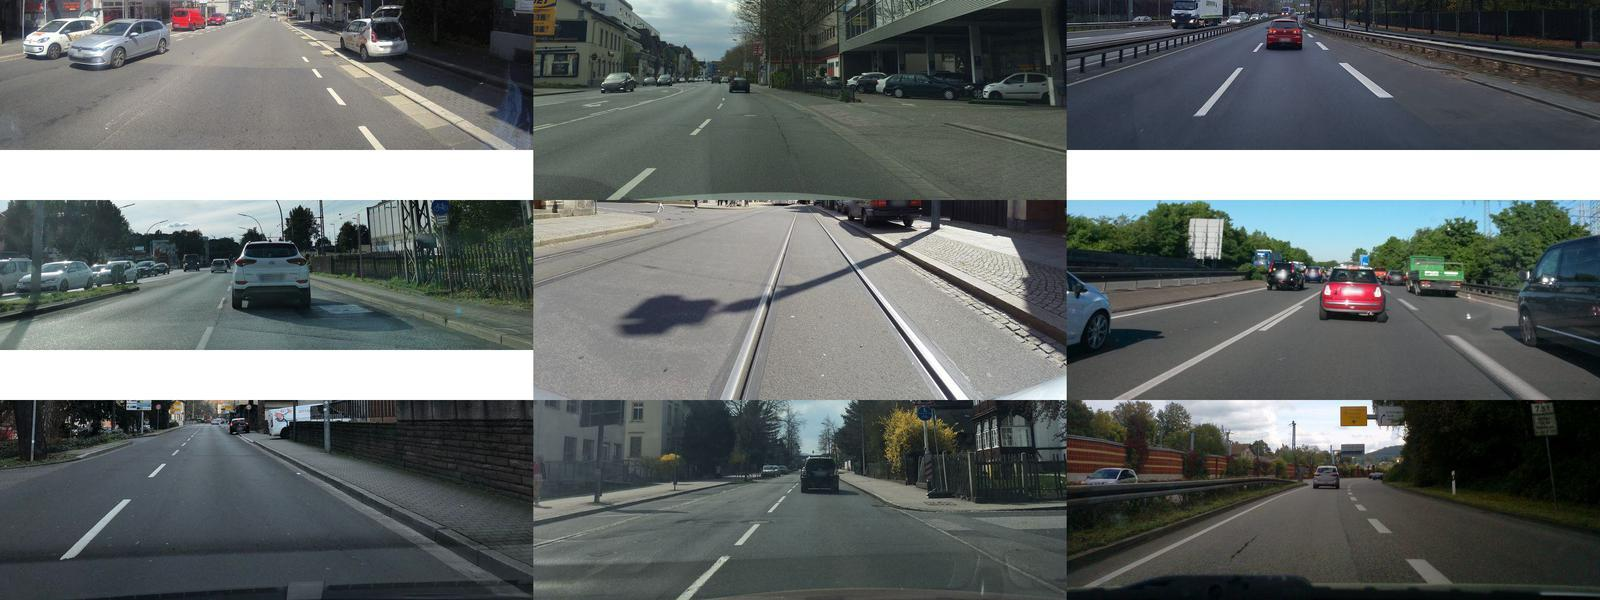
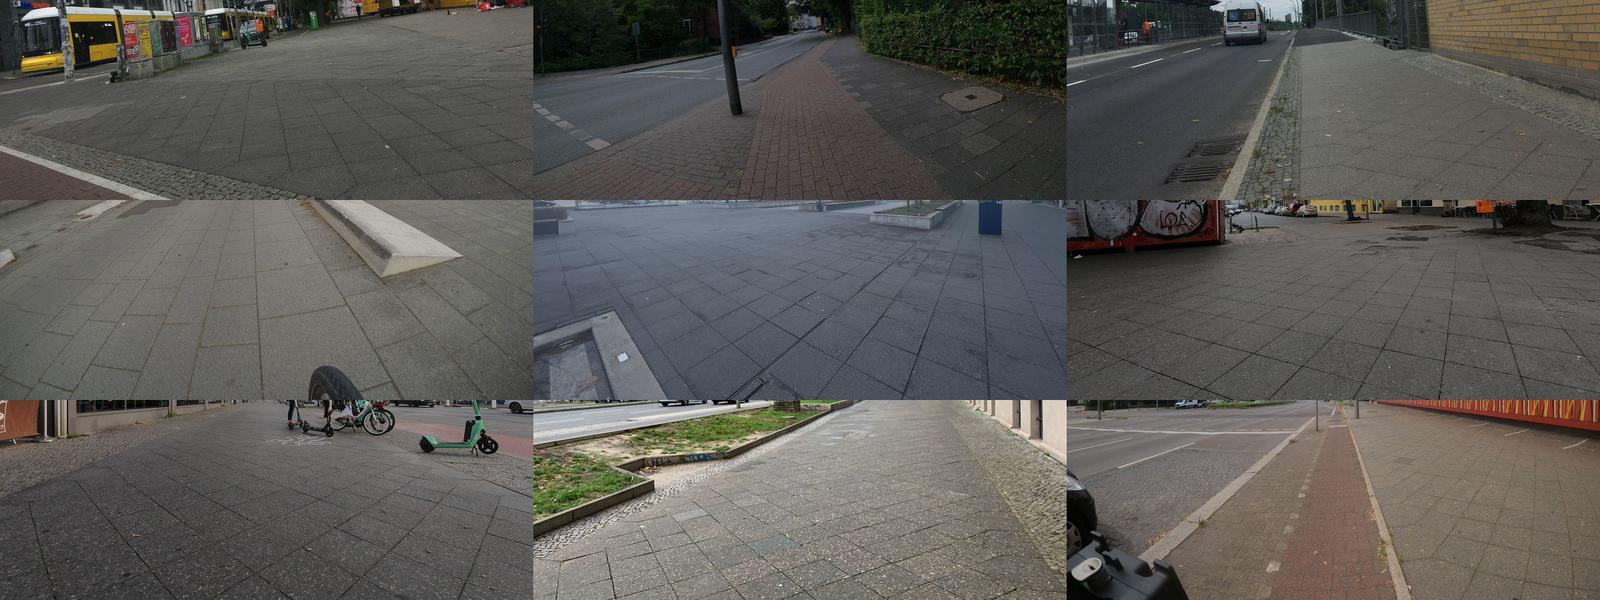
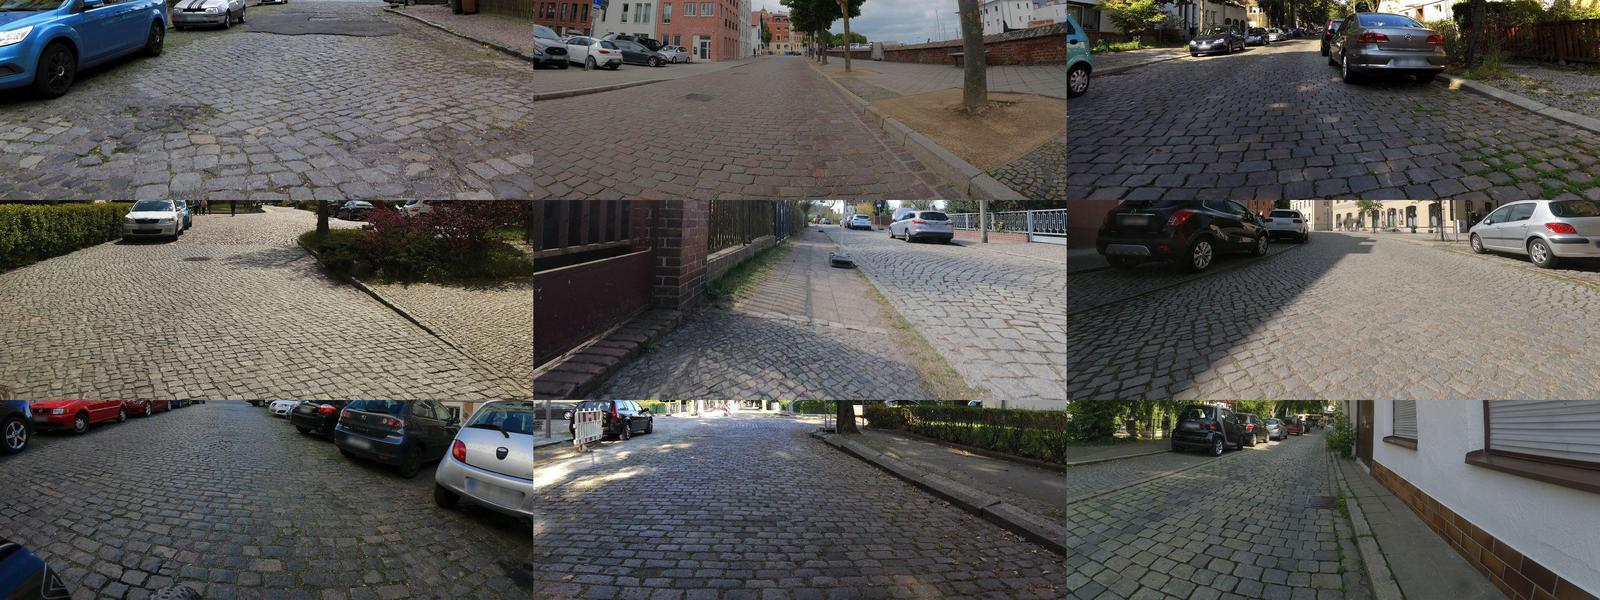
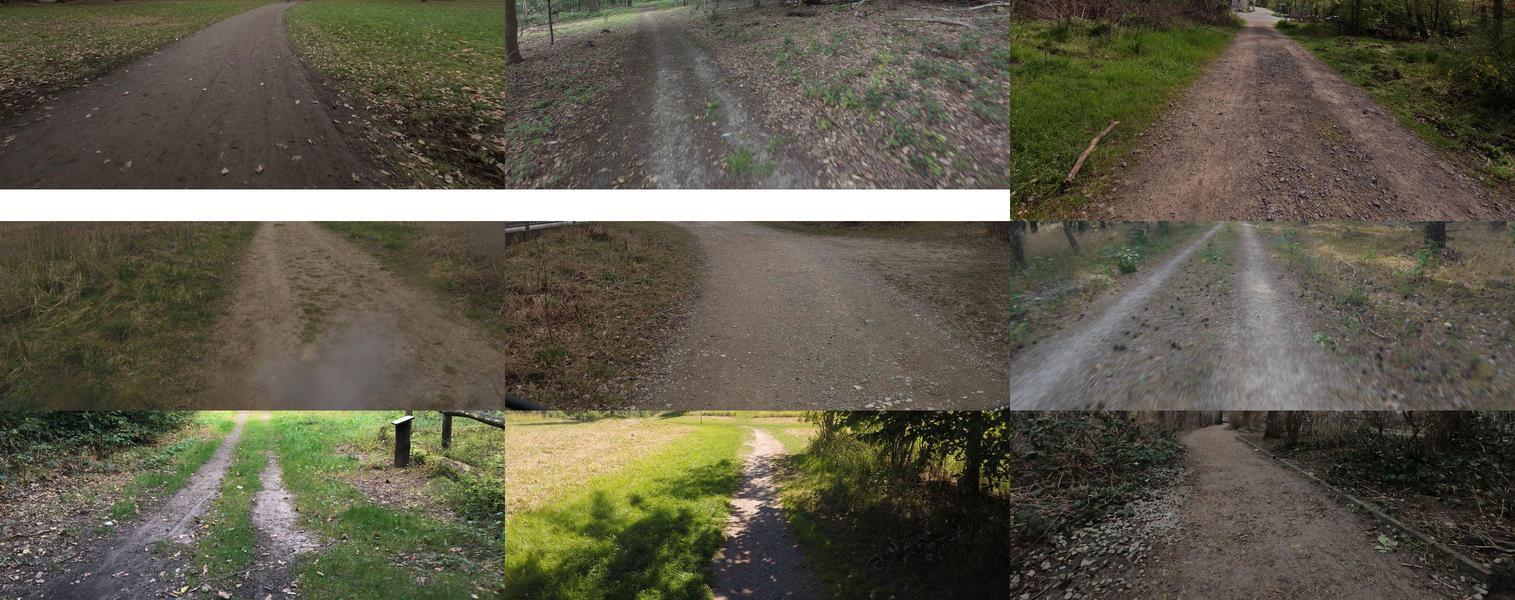
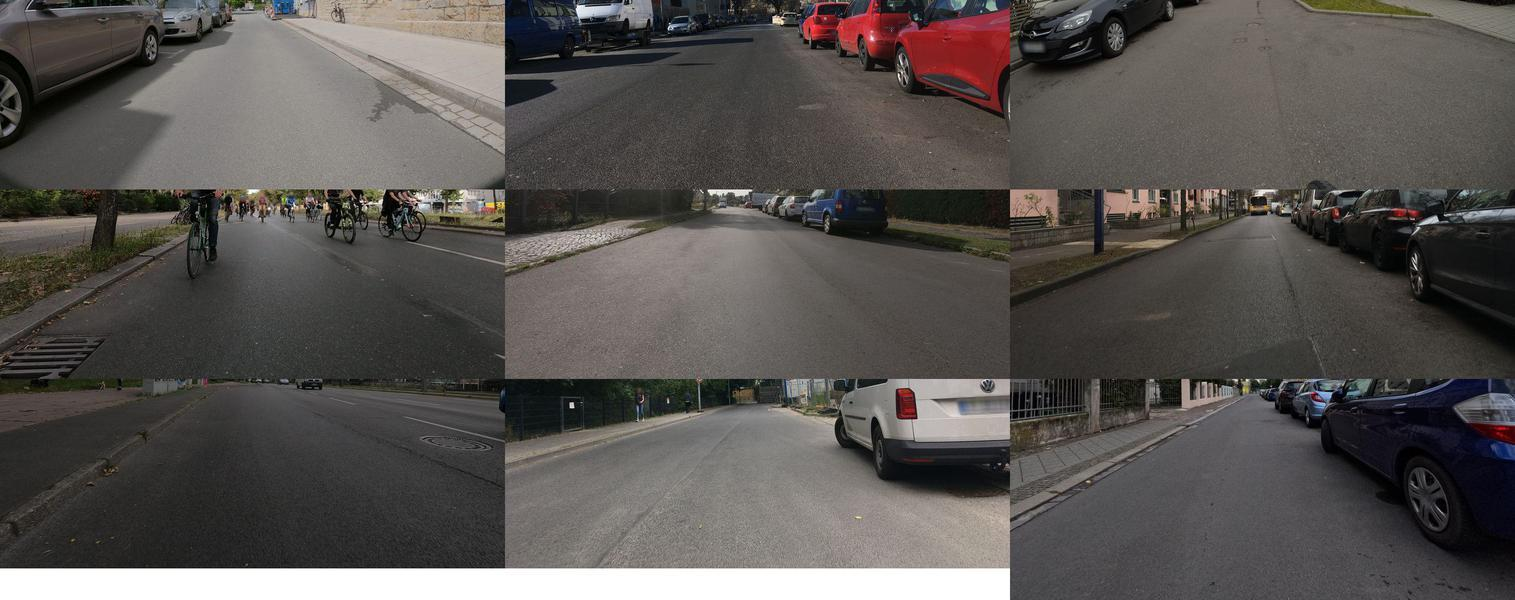
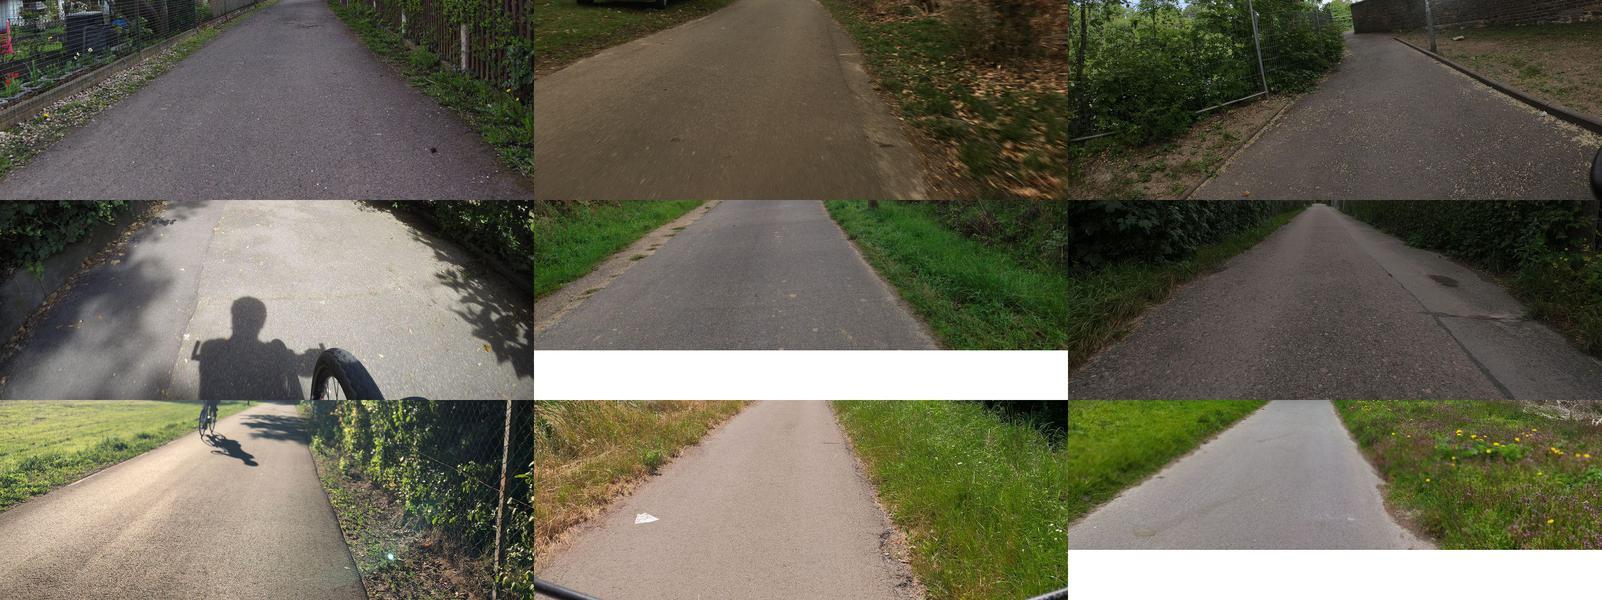
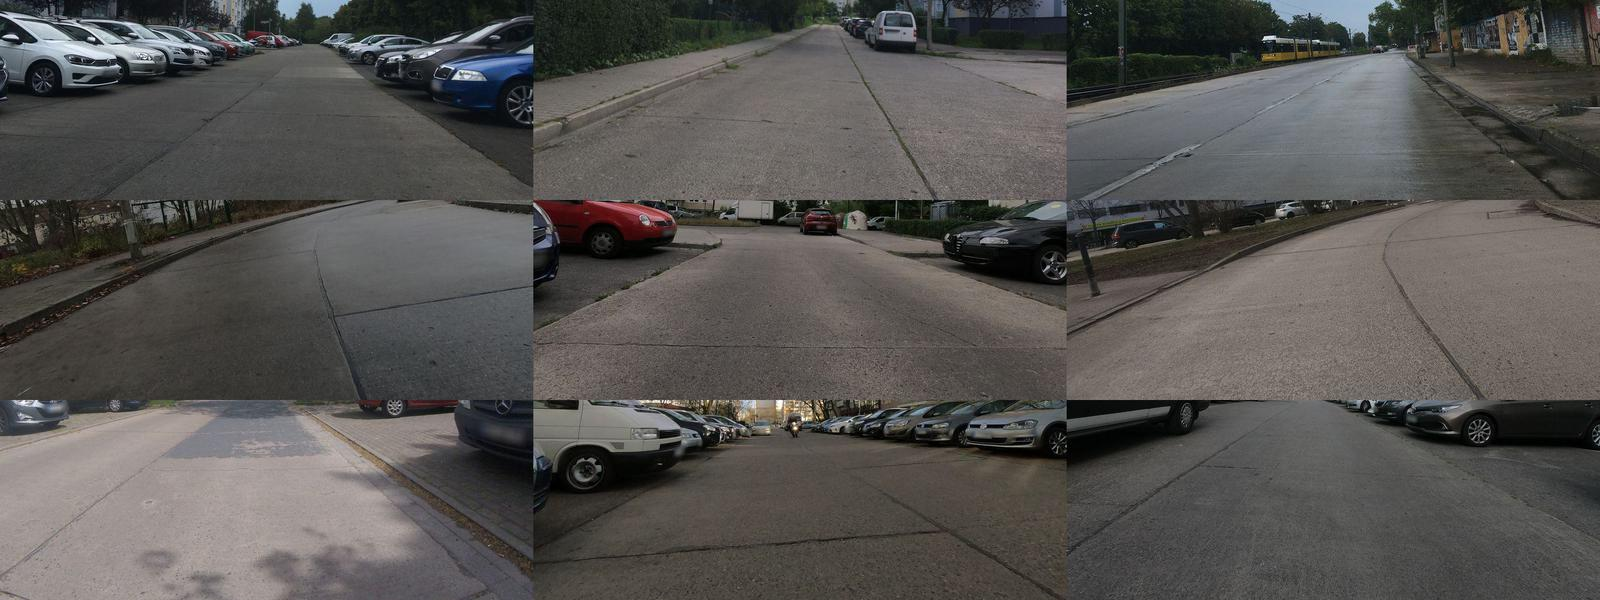
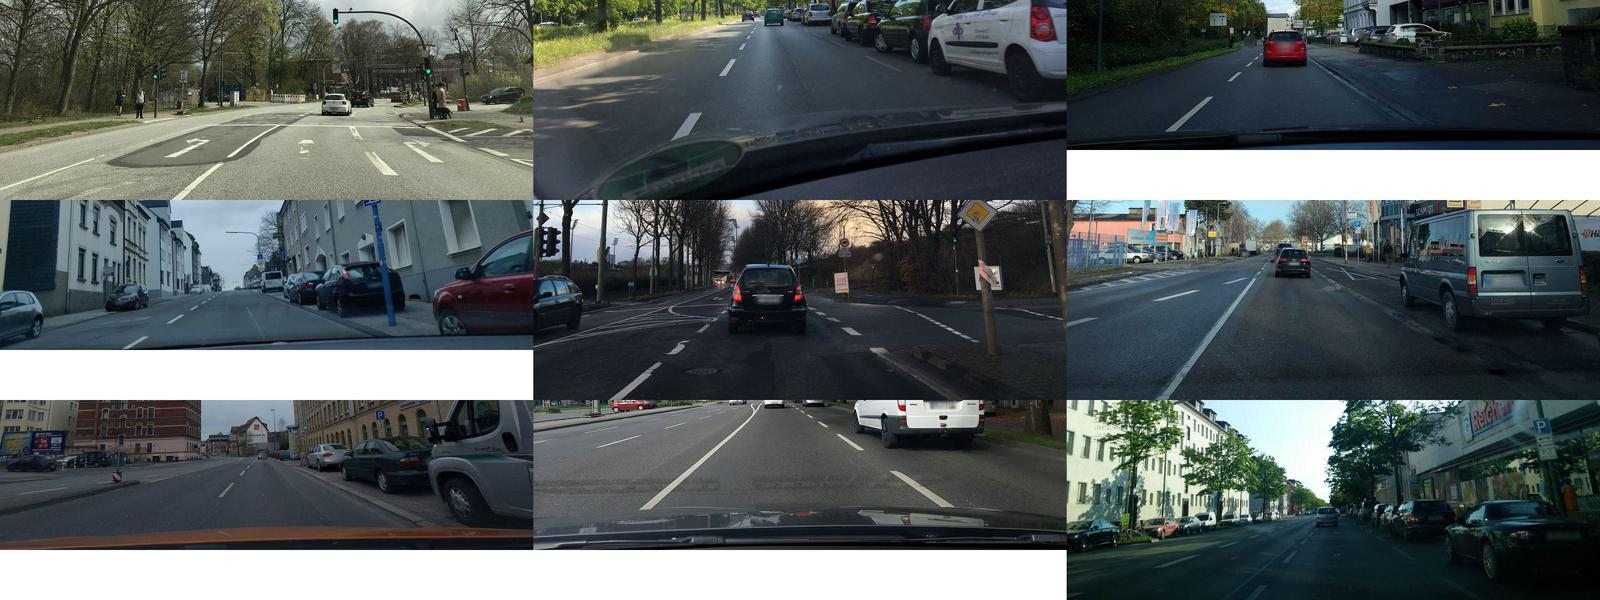
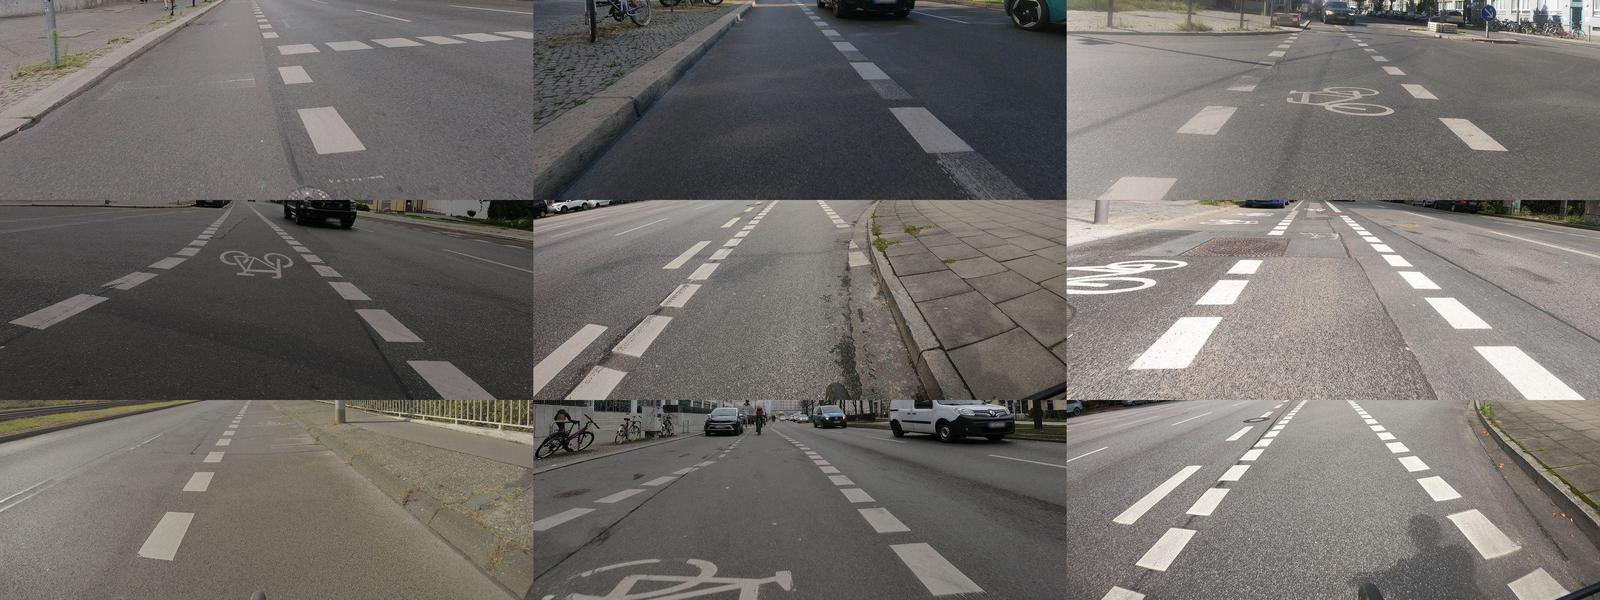
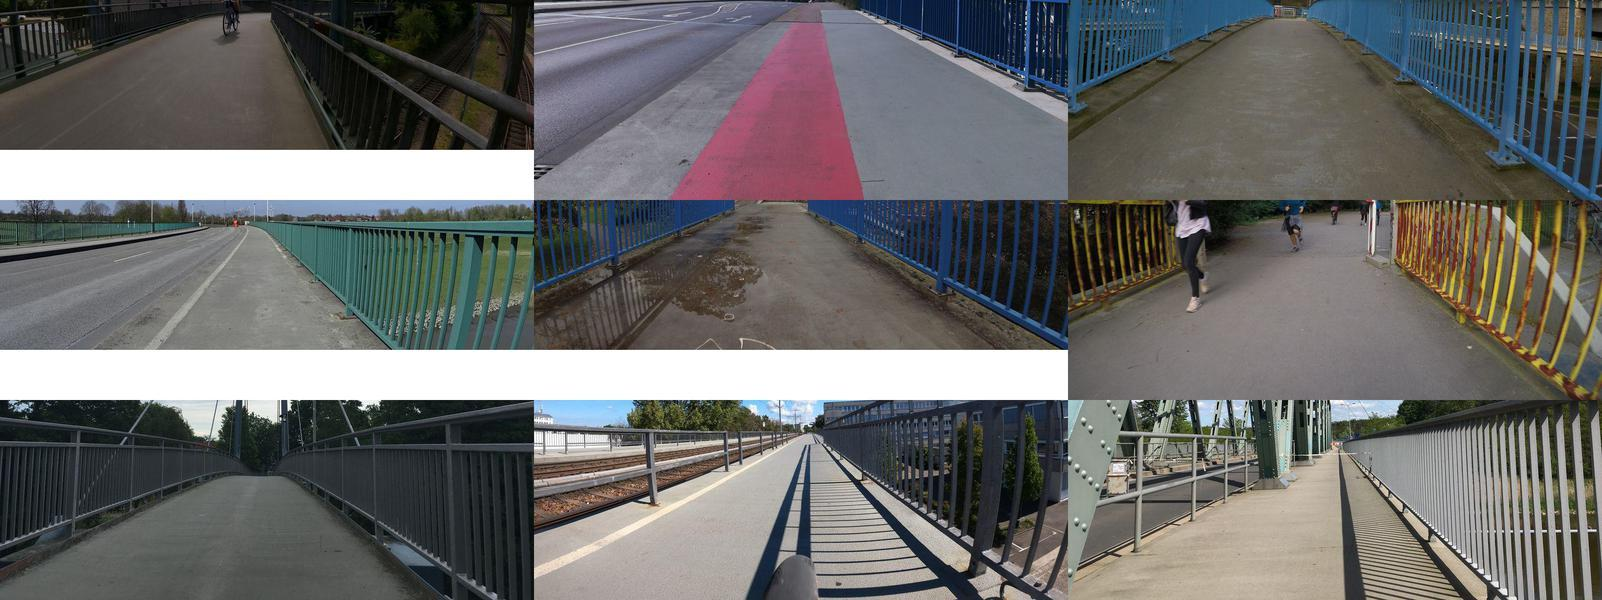
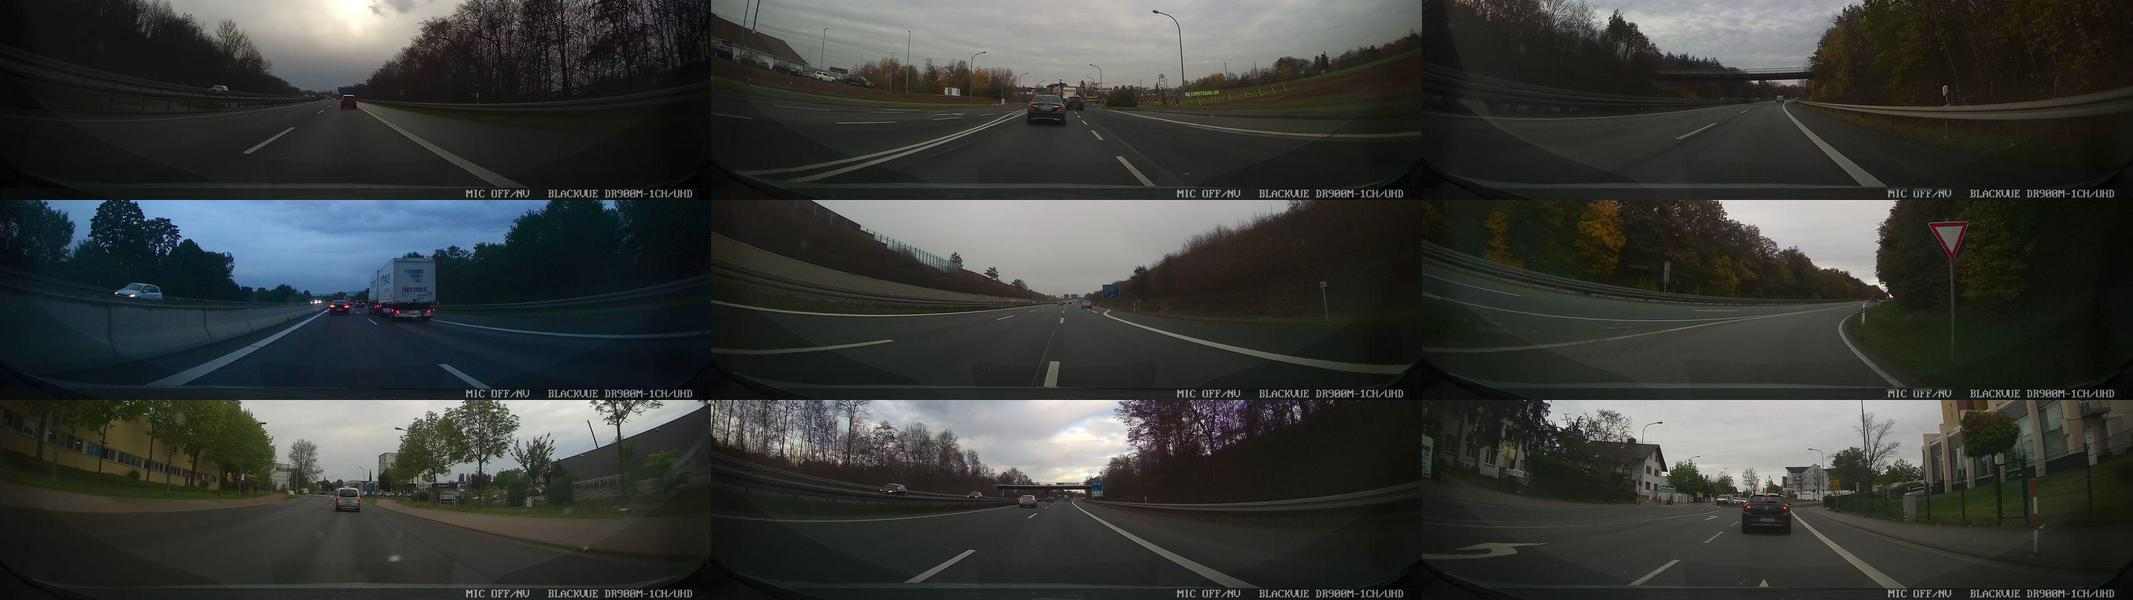
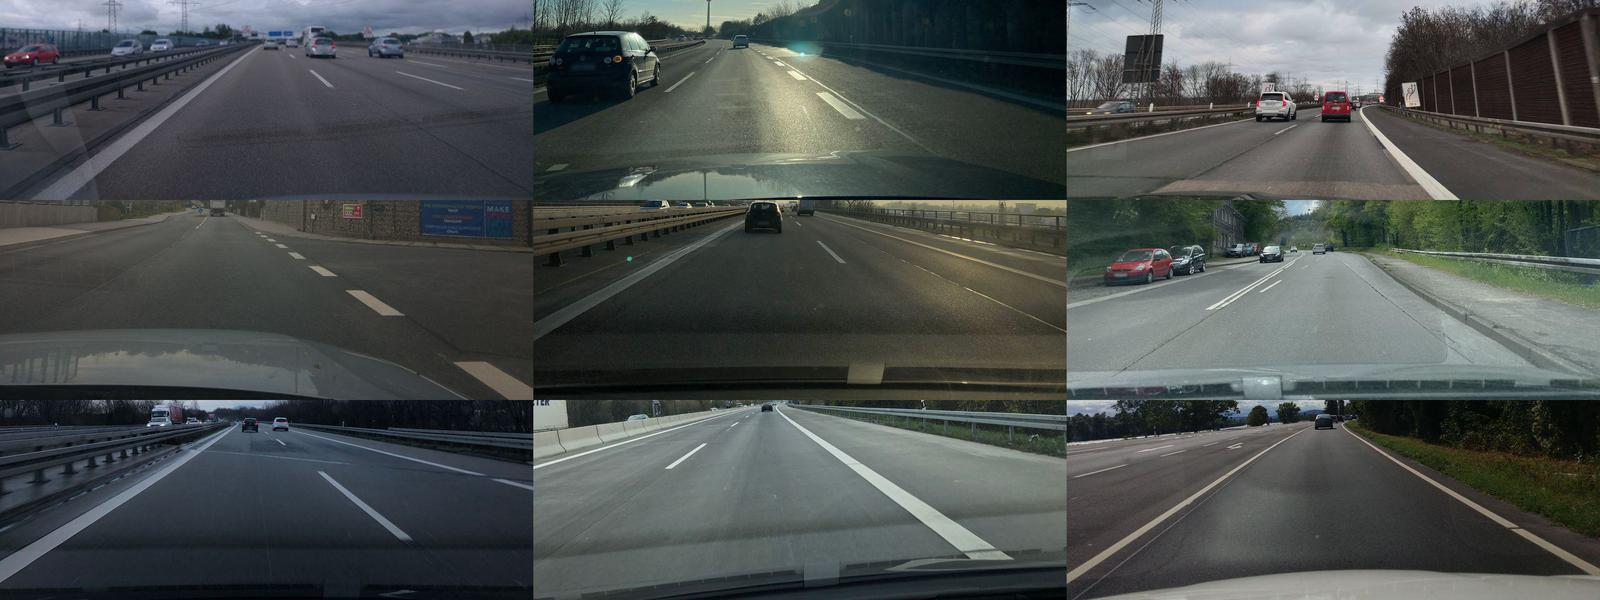
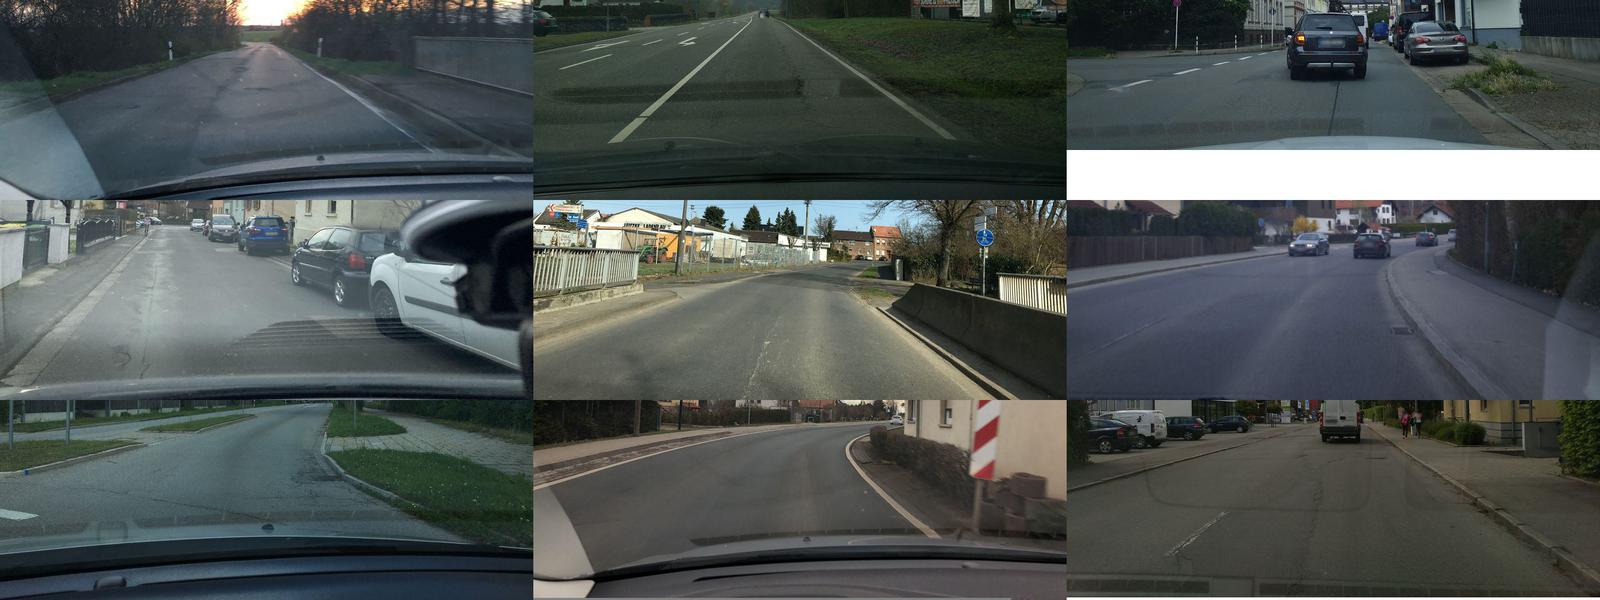
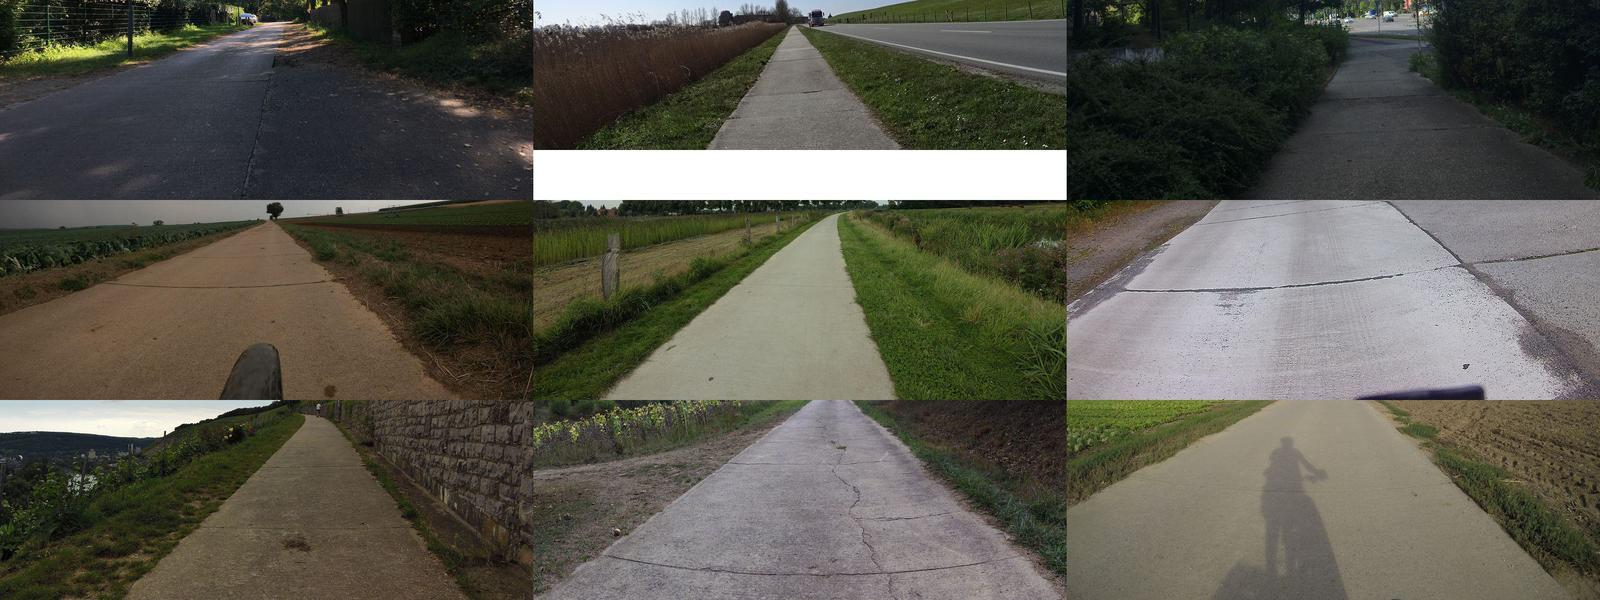
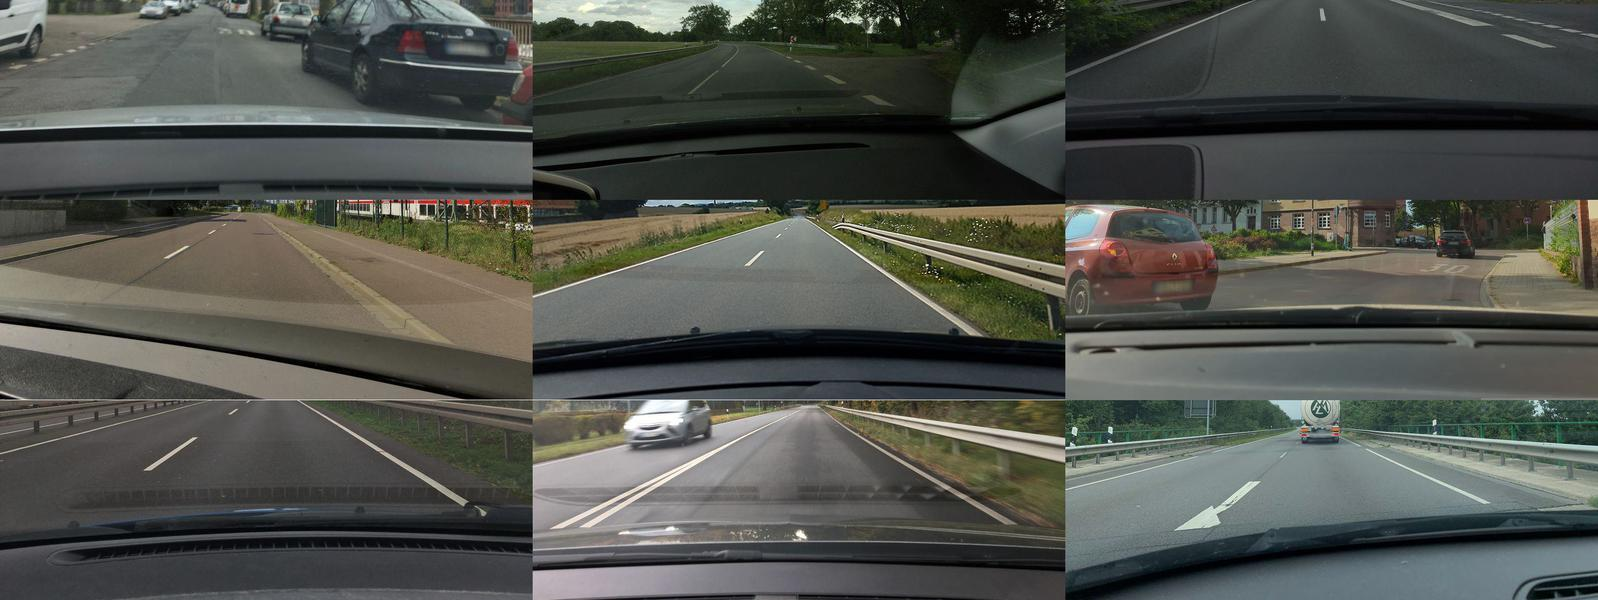
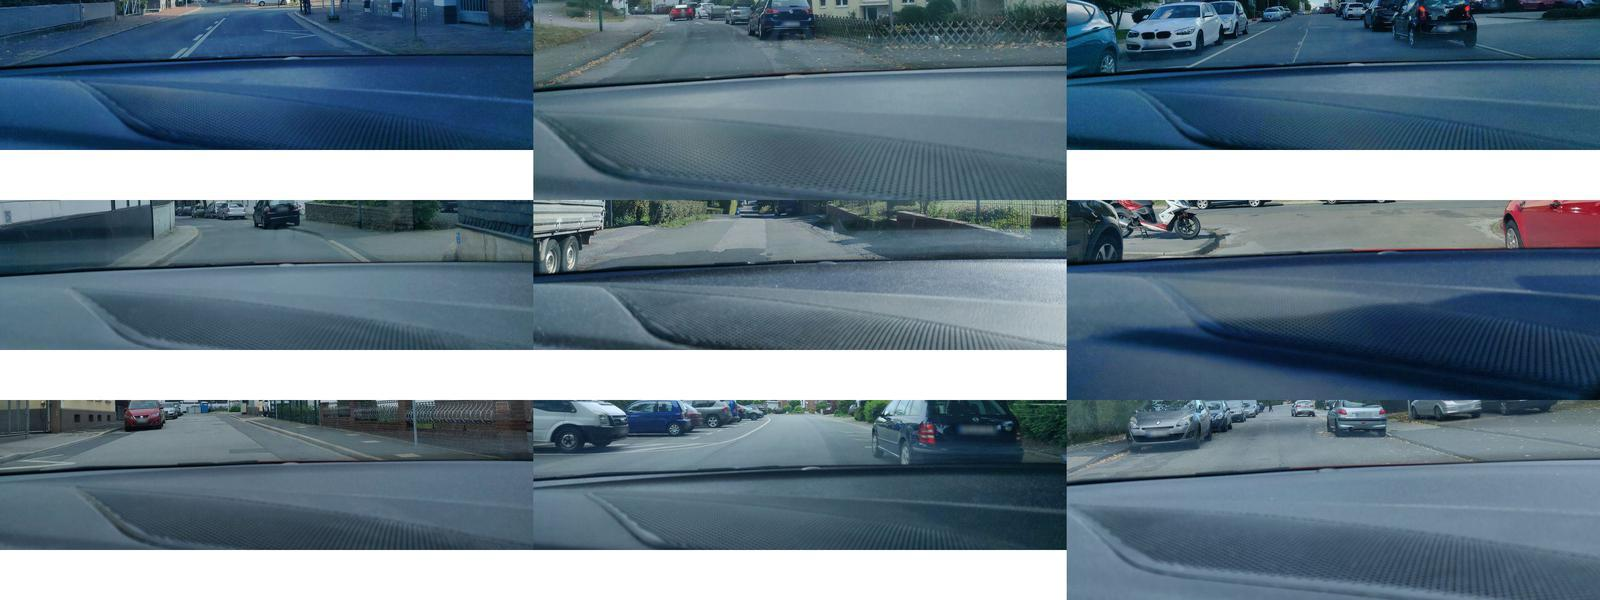
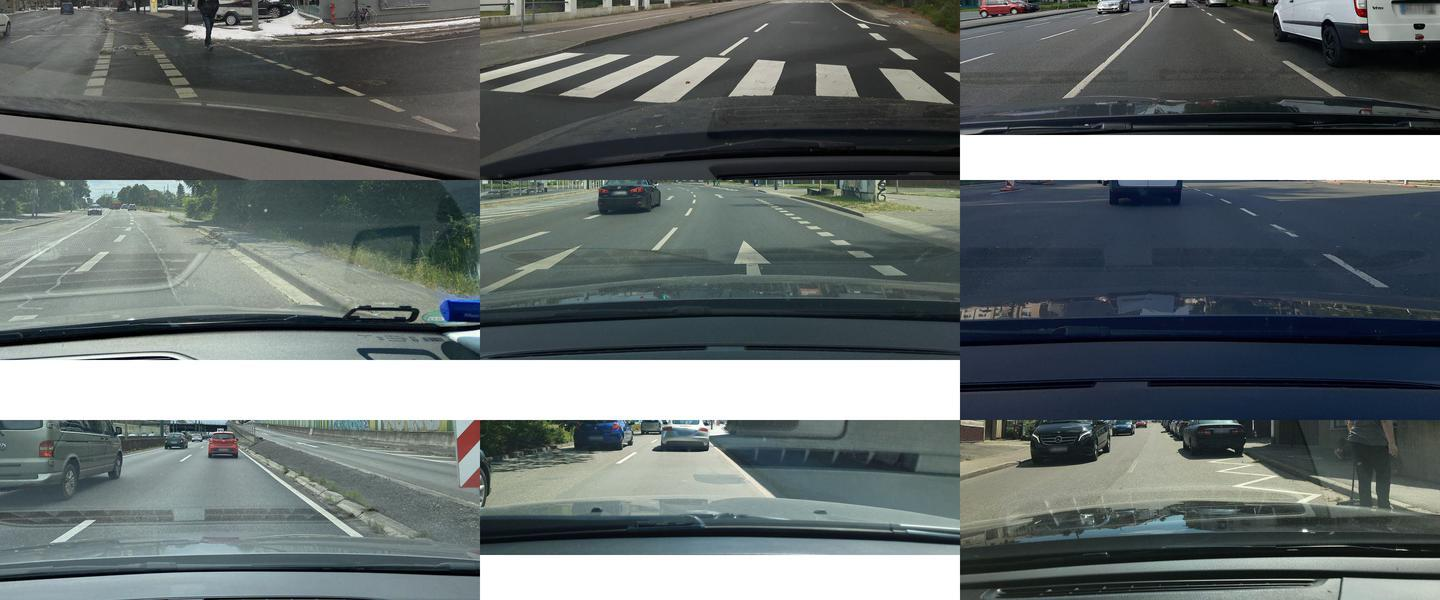
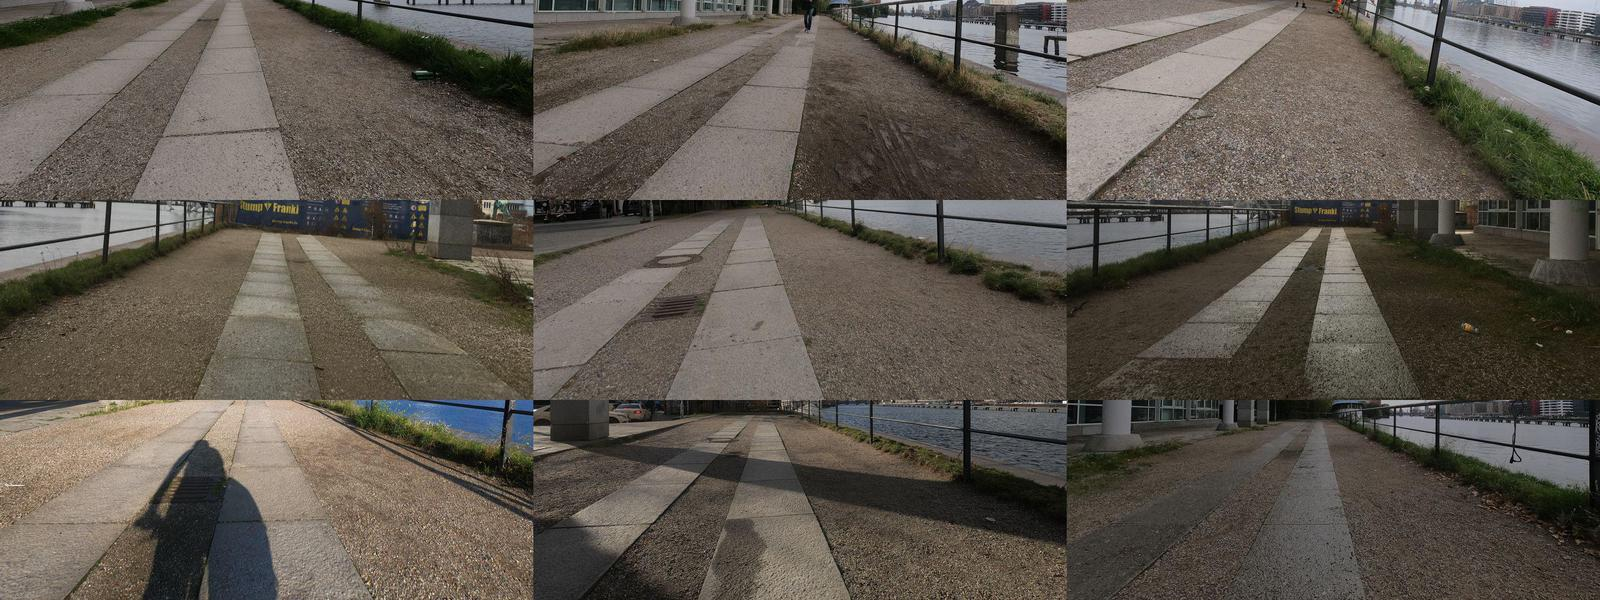
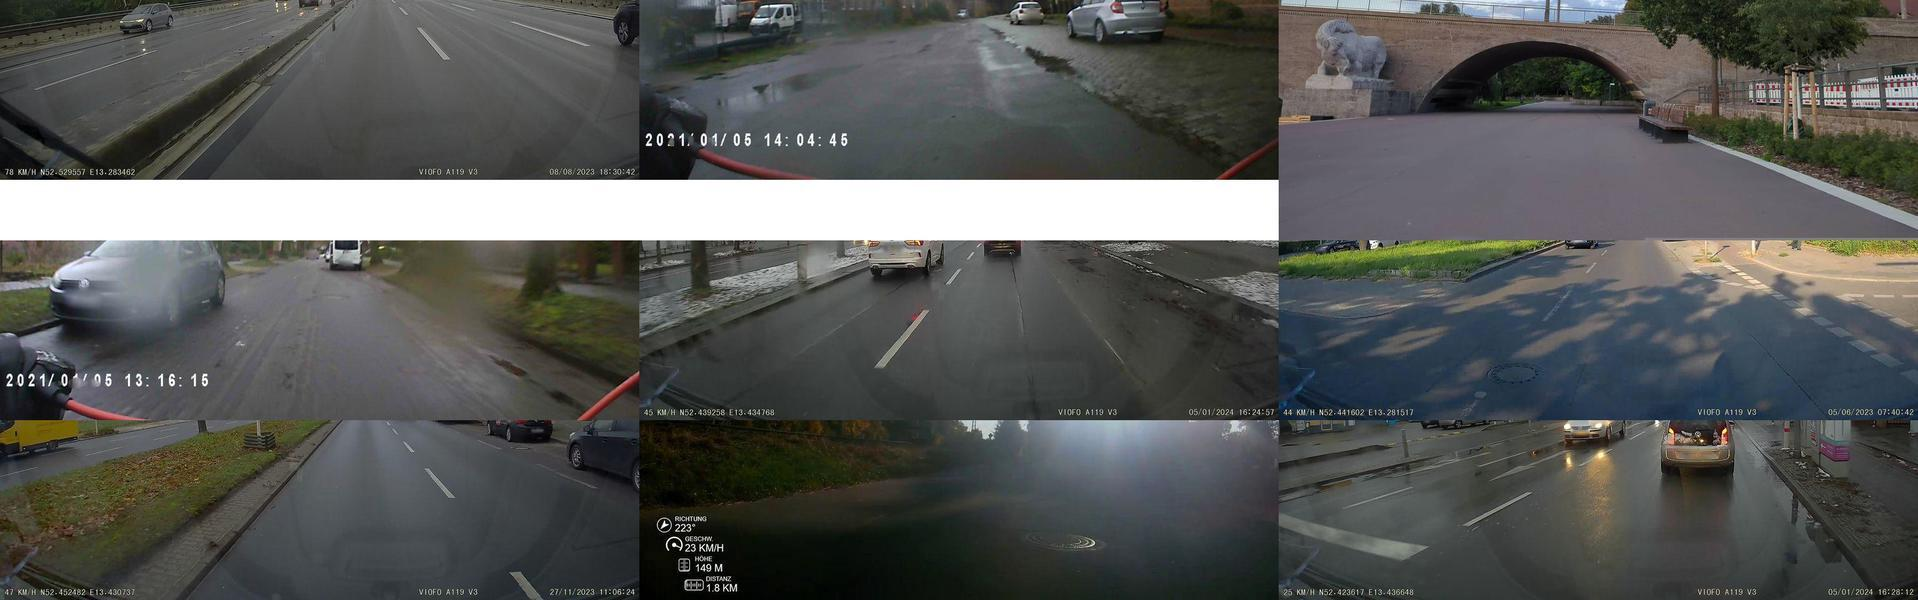
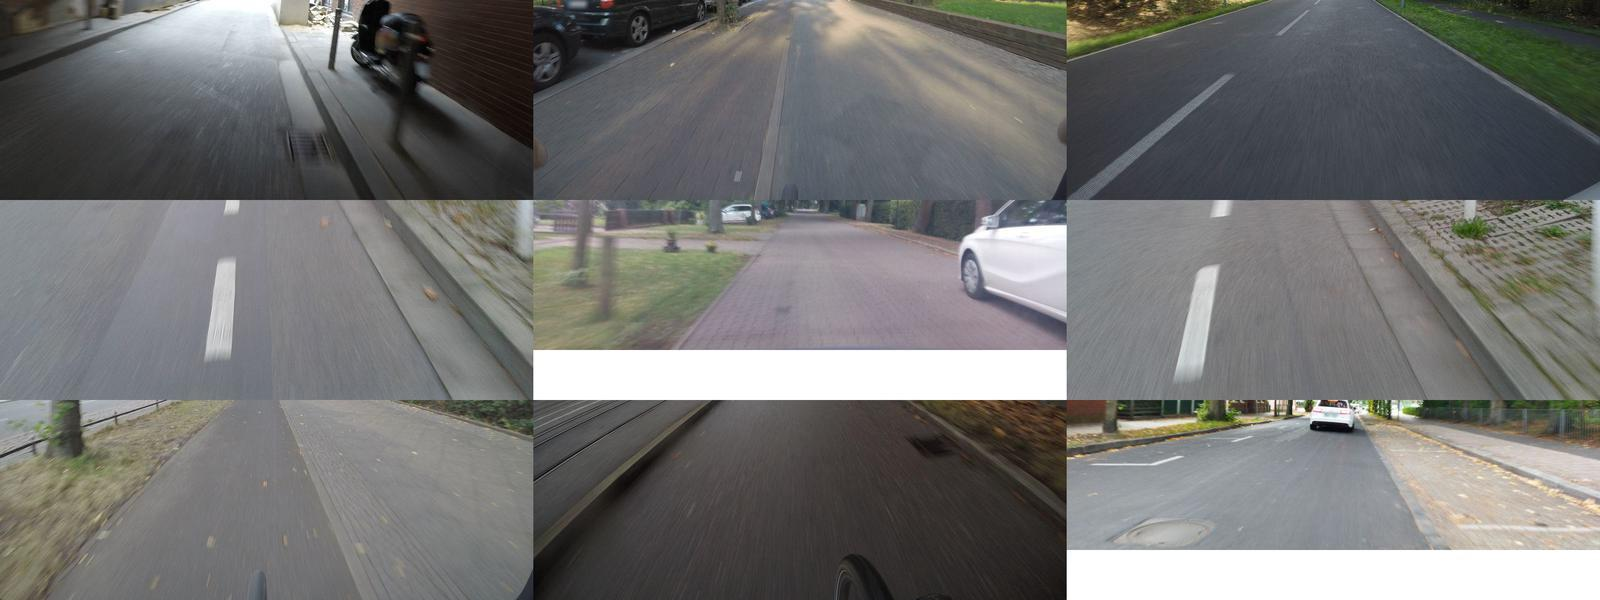
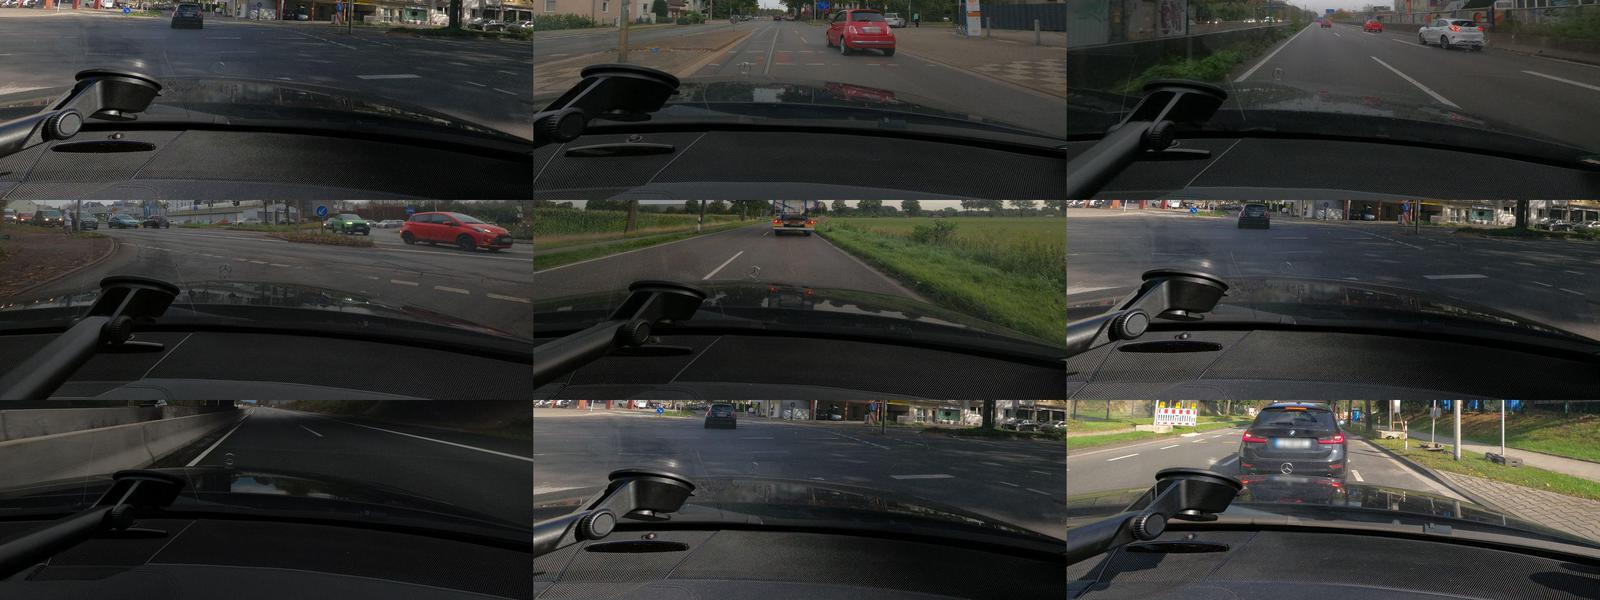
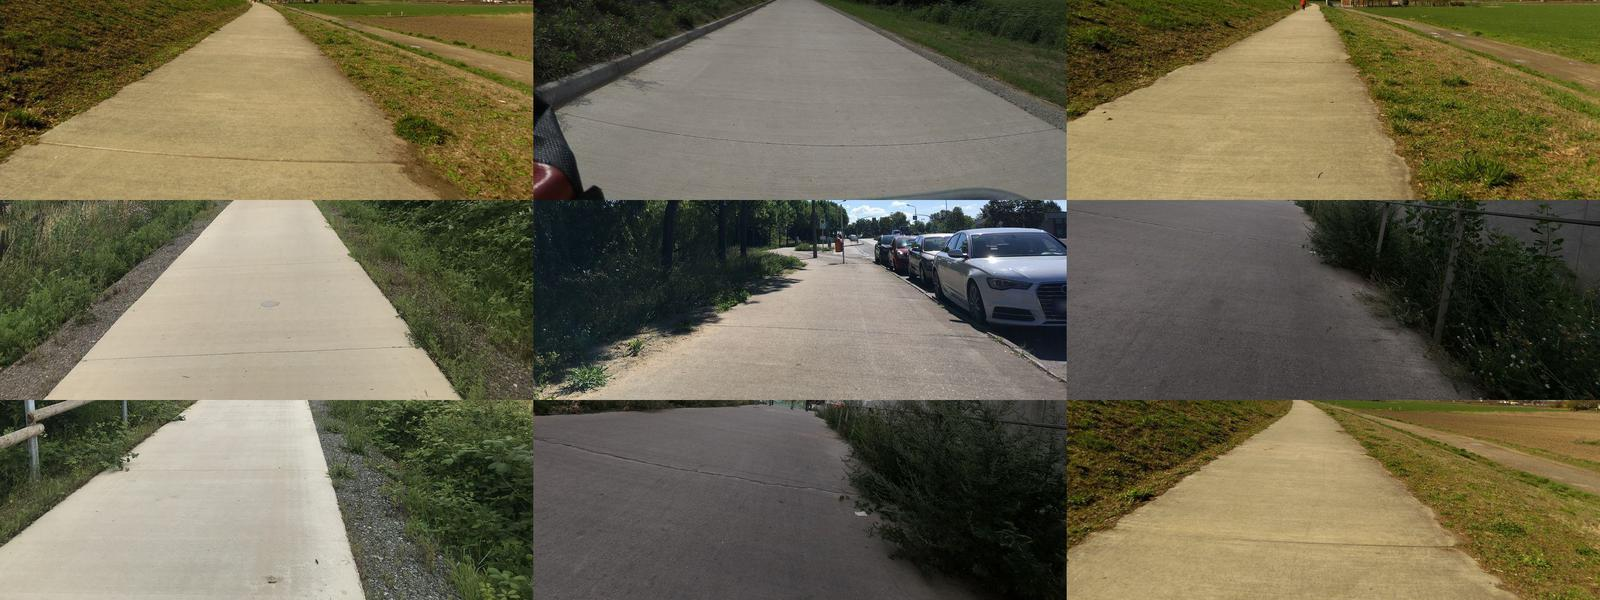
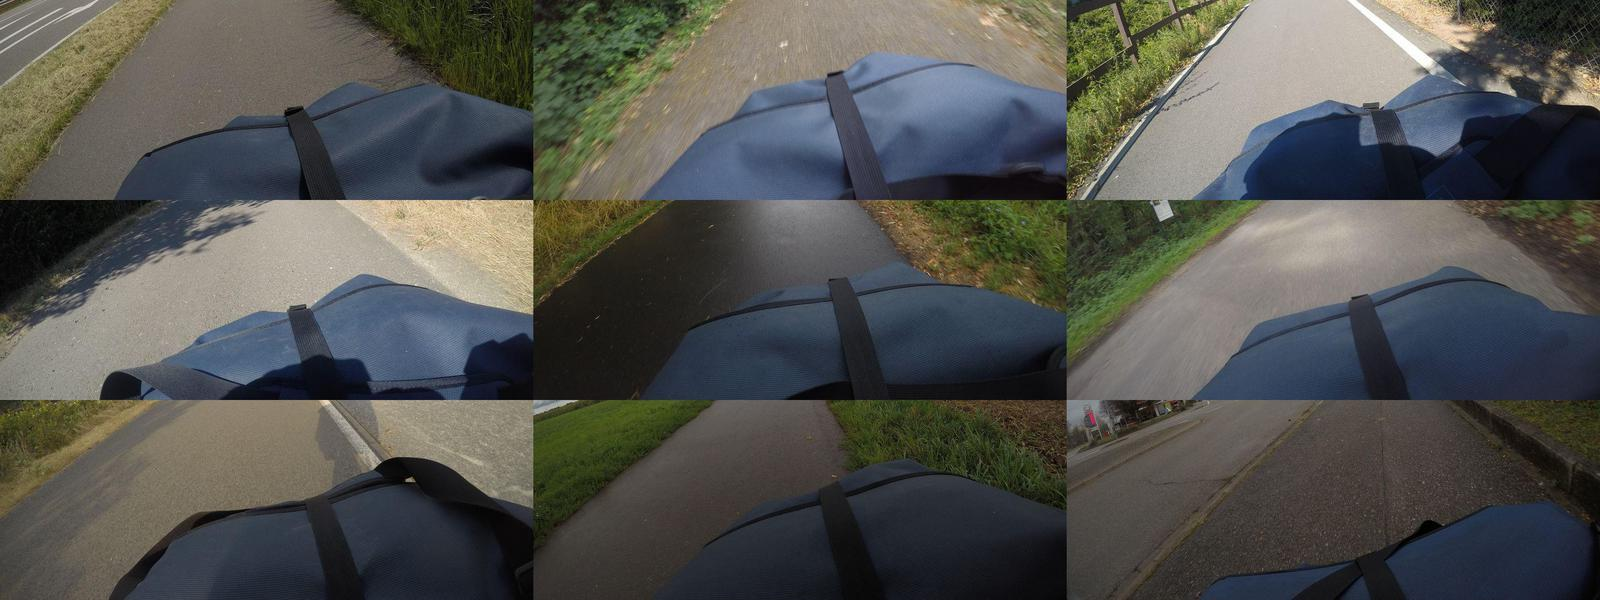
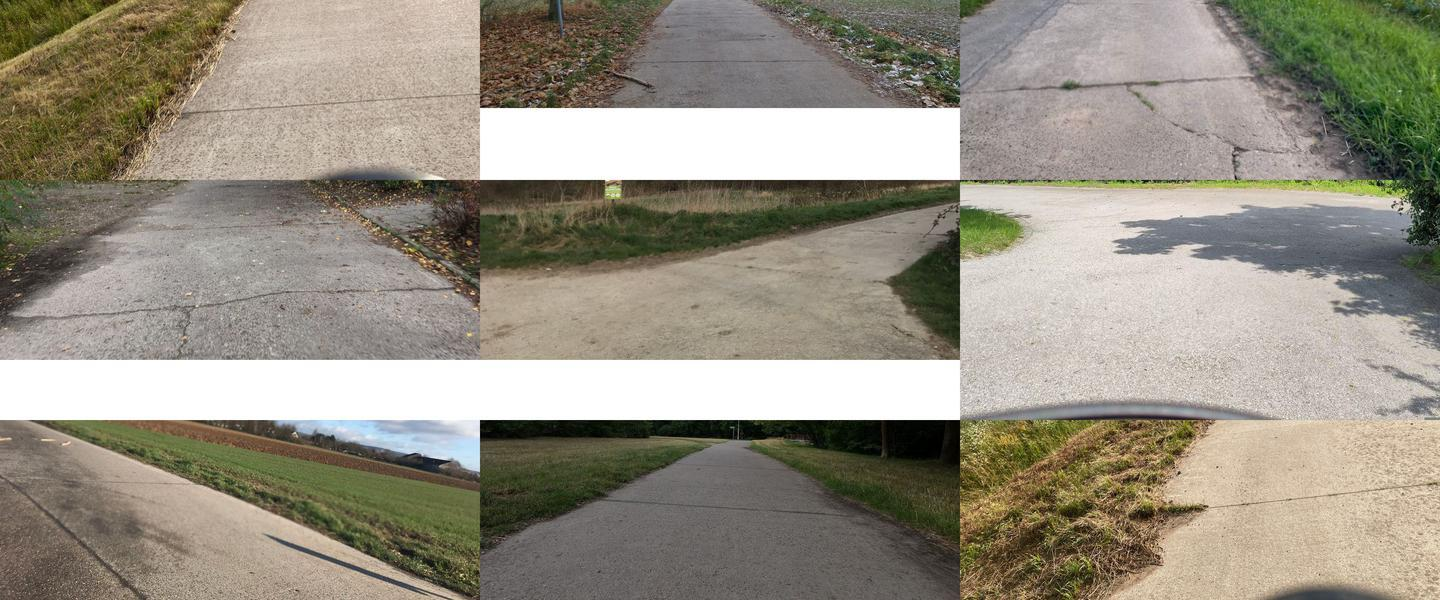
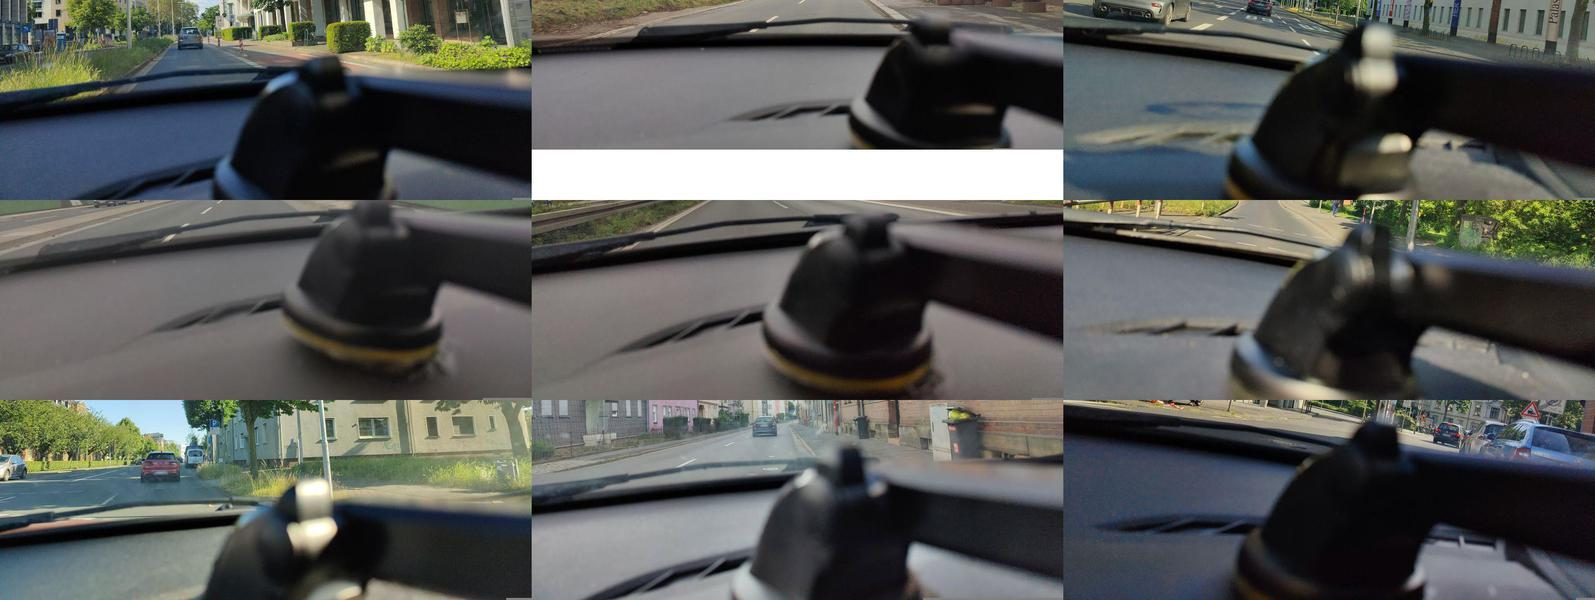
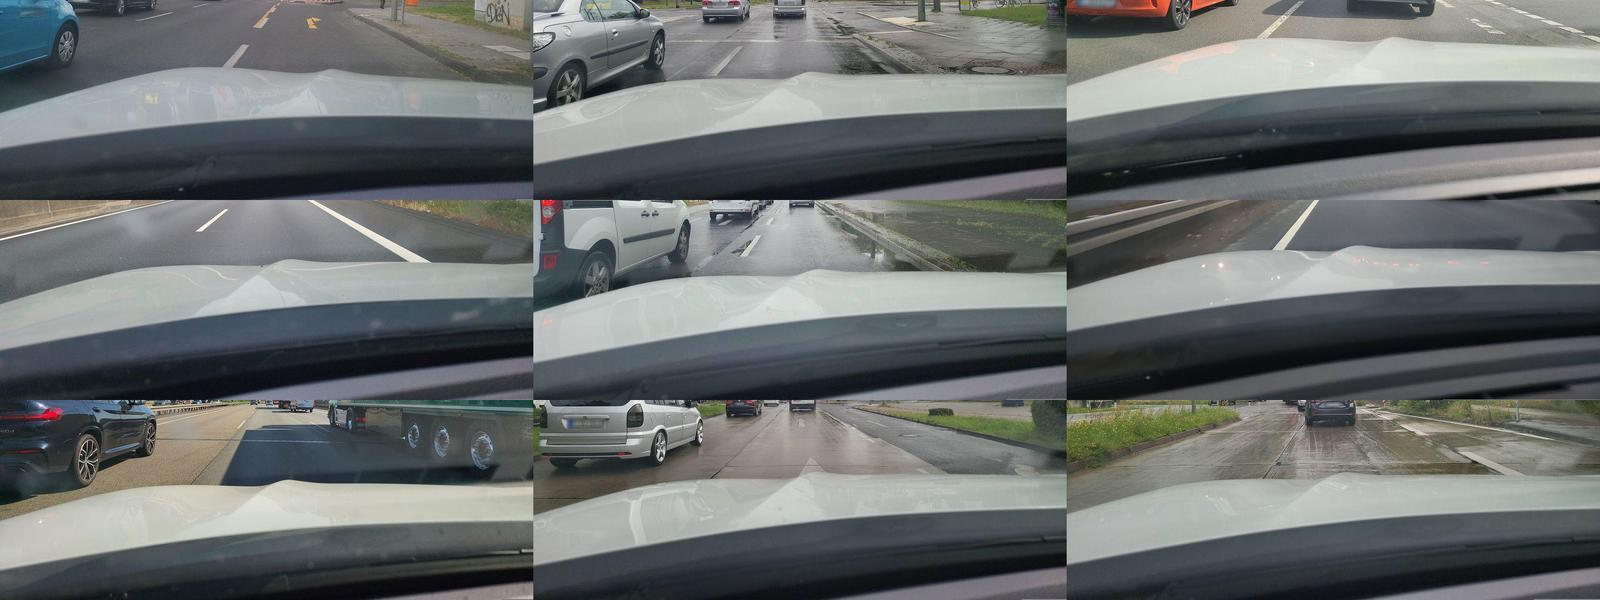
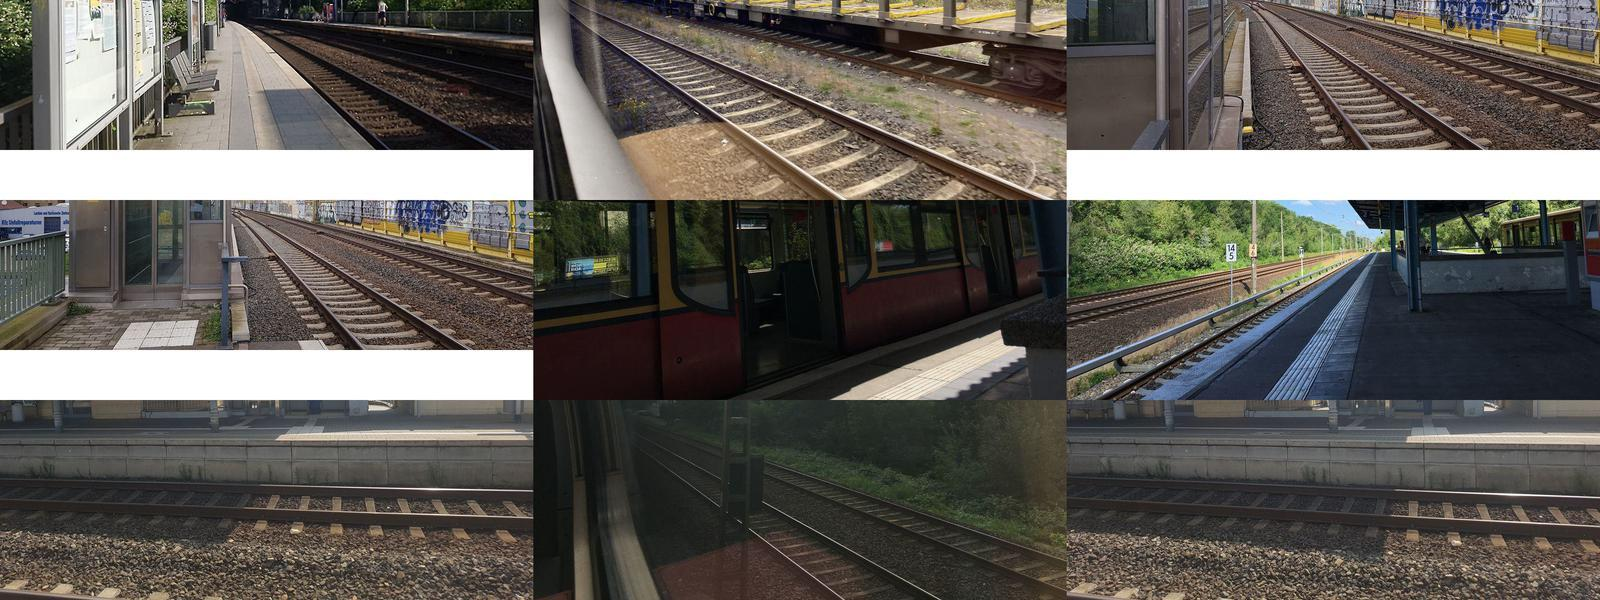
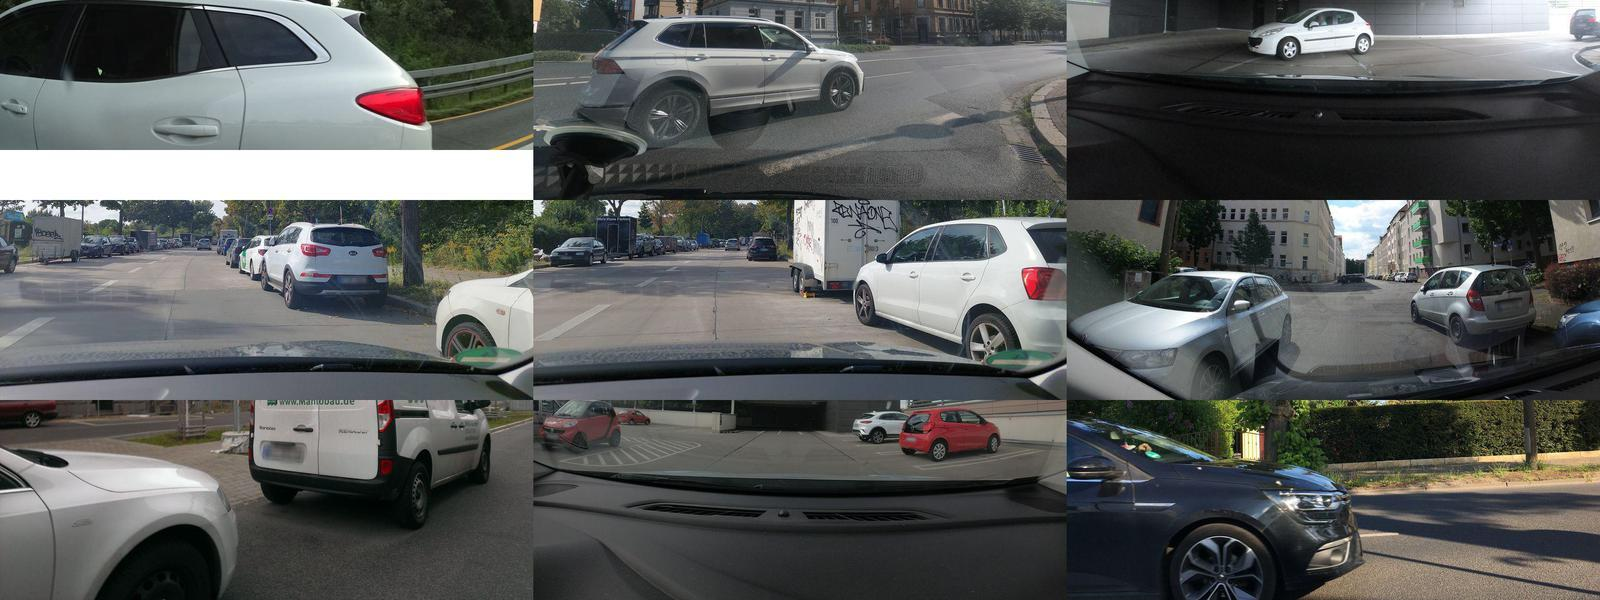
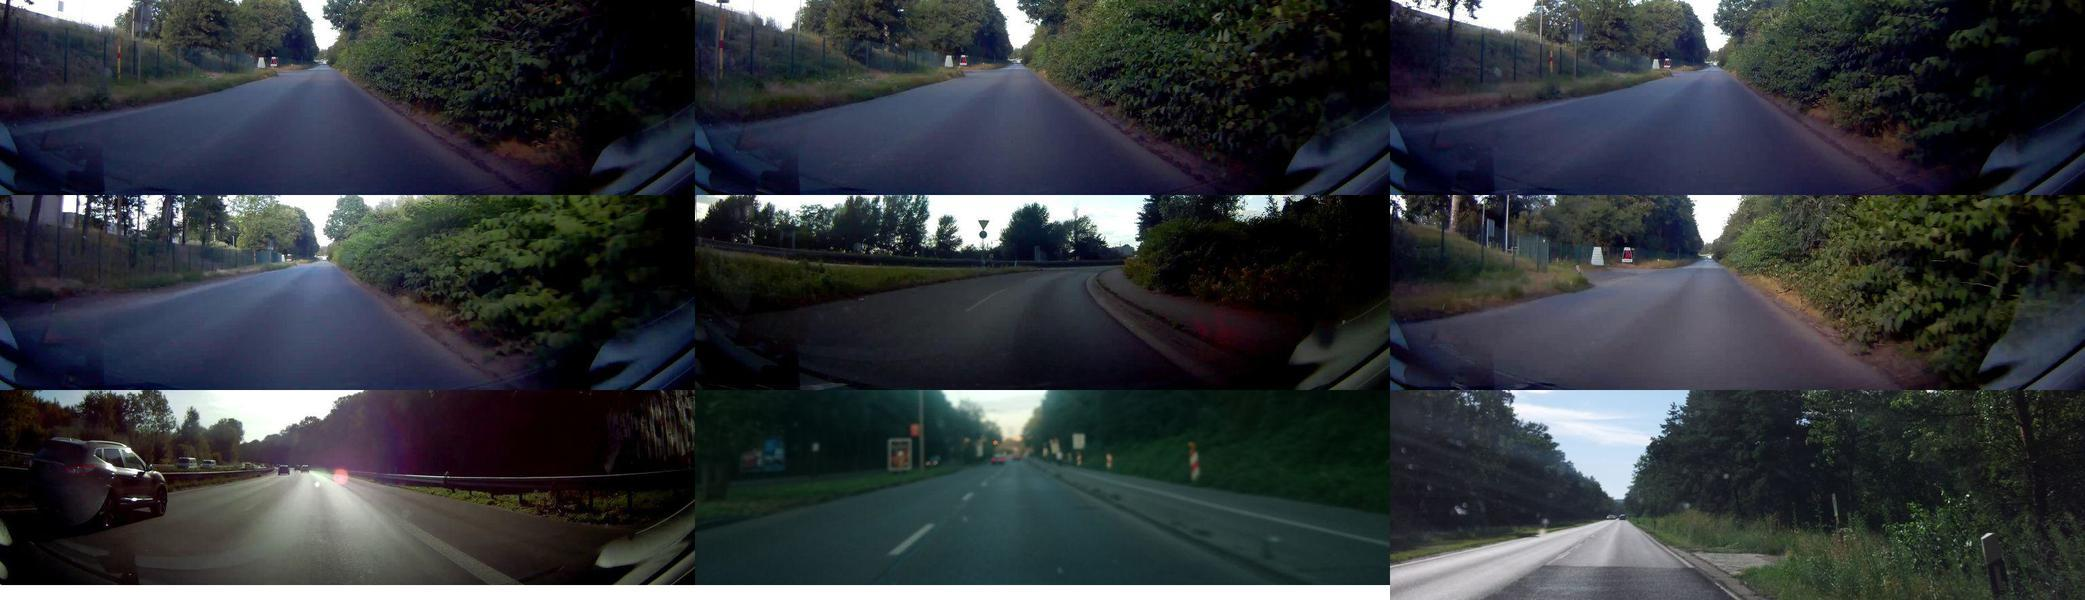
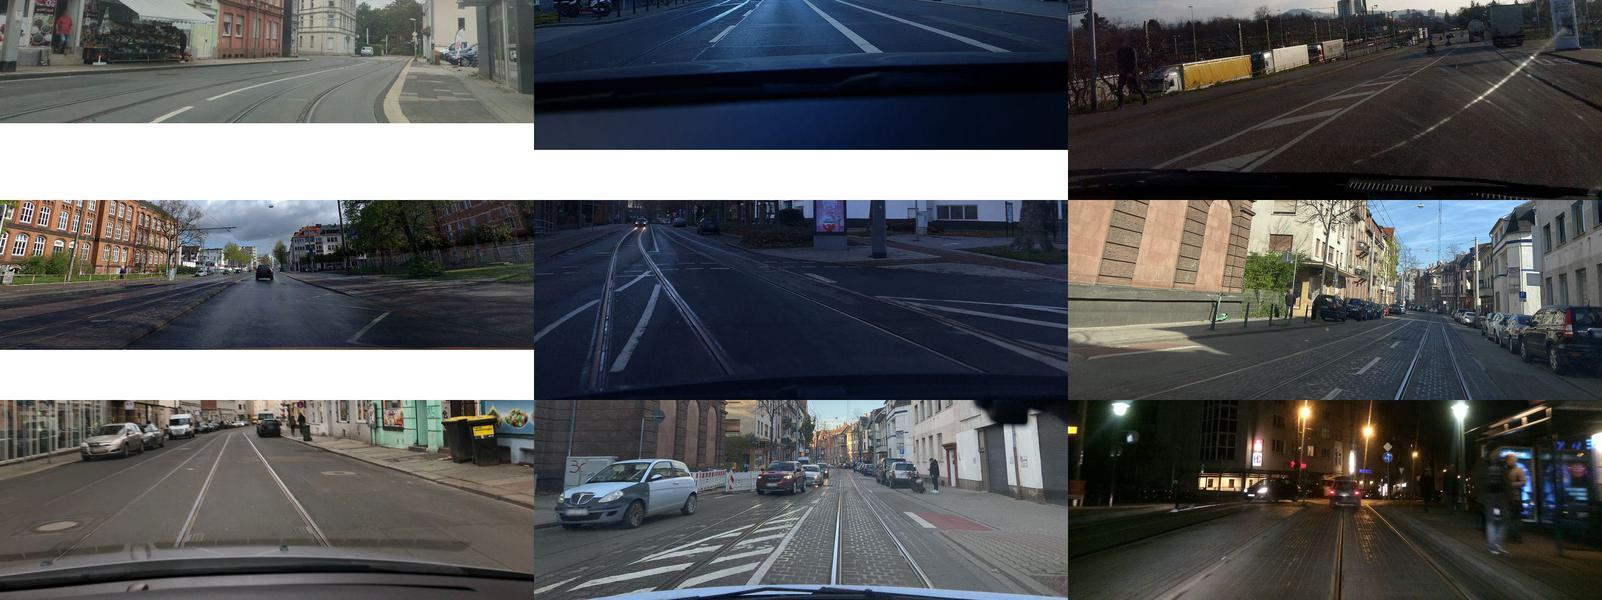

In [111]:
df = loaded_topic_model.get_topic_info().drop("Representative_Docs", axis=1).drop("Name", axis=1)

# Visualize the images
HTML(df.to_html(formatters={'Visual_Aspect': image_formatter}, escape=False))

In [66]:
# IMPORTANT: images must be the same and in same order as model is trained with
# info = loaded_topic_model.get_document_info(images)

# load info saved during taining
model_csv = model_name + '.csv'
csv_path = os.path.join(model_root, model_csv)
info = pd.read_csv(csv_path)
info

Document  Topic  \
0     /home/edith/classification_models/data/trainin...     -1   
1     /home/edith/classification_models/data/trainin...     -1   
2     /home/edith/classification_models/data/trainin...      5   
3     /home/edith/classification_models/data/trainin...     61   
4     /home/edith/classification_models/data/trainin...     -1   
...                                                 ...    ...   
9975  /home/edith/classification_models/data/trainin...     23   
9976  /home/edith/classification_models/data/trainin...     -1   
9977  /home/edith/classification_models/data/trainin...     -1   
9978  /home/edith/classification_models/data/trainin...     -1   
9979  /home/edith/classification_models/data/trainin...     -1   

                                  Name  \
0     -1_trucks_street_cars_skateboard   
1     -1_trucks_street_cars_skateboard   
2           5_daytime_driving_past_are   
3               61_red_bus_light_scene   
4     -1_trucks_street_cars_skateboard   
...                                ...   
9975         23_trail_forest_logs_pile   
9976  -1_trucks_street_cars_skateboard   
9977  -1_trucks_street_cars_skateboard   
9978  -1_trucks_street_cars_skateboard   
9979  -1_trucks_street_cars_skateboard   

                                         Representation  \
0     ['trucks', 'street', 'cars', 'skateboard', 'fi...   
1     ['trucks', 'street', 'cars', 'skateboard', 'fi...   
2     ['daytime', 'driving', 'past', 'are', 'tall', ...   
3     ['red', 'bus', 'light', 'scene', 'next', 'hydr...   
4     ['trucks', 'street', 'cars', 'skateboard', 'fi...   
...                                                 ...   
9975  ['trail', 'forest', 'logs', 'pile', 'branch', ...   
9976  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
9977  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
9978  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
9979  ['trucks', 'street', 'cars', 'skateboard', 'fi...   

                                          Visual_Aspect  \
0     <PIL.Image.Image image mode=RGB size=1600x600 ...   
1     <PIL.Image.Image image mode=RGB size=1600x600 ...   
2     <PIL.Image.Image image mode=RGB size=1600x600 ...   
3     <PIL.Image.Image image mode=RGB size=1600x600 ...   
4     <PIL.Image.Image image mode=RGB size=1600x600 ...   
...                                                 ...   
9975  <PIL.Image.Image image mode=RGB size=1600x600 ...   
9976  <PIL.Image.Image image mode=RGB size=1600x600 ...   
9977  <PIL.Image.Image image mode=RGB size=1600x600 ...   
9978  <PIL.Image.Image image mode=RGB size=1600x600 ...   
9979  <PIL.Image.Image image mode=RGB size=1600x600 ...   

                                    Representative_Docs  \
0     ['a street with cars and a street sign ', 'a r...   
1     ['a street with cars and a street sign ', 'a r...   
2     ['a car driving down a street past a tall buil...   
3     ['a street with a bus parked on the side of th...   
4     ['a street with cars and a street sign ', 'a r...   
...                                                 ...   
9975  ['a trail of dirt and trees in a forest ', 'a ...   
9976  ['a street with cars and a street sign ', 'a r...   
9977  ['a street with cars and a street sign ', 'a r...   
9978  ['a street with cars and a street sign ', 'a r...   
9979  ['a street with cars and a street sign ', 'a r...   

                                            Top_n_words  Probability  \
0     trucks - street - cars - skateboard - filled -...     0.000000   
1     trucks - street - cars - skateboard - filled -...     0.000000   
2     daytime - driving - past - are - tall - behind...     0.681689   
3     red - bus - light - scene - next - hydrant - f...     0.898609   
4     trucks - street - cars - skateboard - filled -...     0.000000   
...                                                 ...          ...   
9975  trail - forest - logs - pile - branch - in - t...     1.000000   
9976  trucks - street - cars - skateboard - fi

In [67]:
info.head(20)

Document  Topic  \
0   /home/edith/classification_models/data/trainin...     -1   
1   /home/edith/classification_models/data/trainin...     -1   
2   /home/edith/classification_models/data/trainin...      5   
3   /home/edith/classification_models/data/trainin...     61   
4   /home/edith/classification_models/data/trainin...     -1   
5   /home/edith/classification_models/data/trainin...     34   
6   /home/edith/classification_models/data/trainin...     -1   
7   /home/edith/classification_models/data/trainin...     -1   
8   /home/edith/classification_models/data/trainin...     -1   
9   /home/edith/classification_models/data/trainin...      0   
10  /home/edith/classification_models/data/trainin...     -1   
11  /home/edith/classification_models/data/trainin...     -1   
12  /home/edith/classification_models/data/trainin...     -1   
13  /home/edith/classification_models/data/trainin...     -1   
14  /home/edith/classification_models/data/trainin...     -1   
15  /home/edith/classification_models/data/trainin...     -1   
16  /home/edith/classification_models/data/trainin...     -1   
17  /home/edith/classification_models/data/trainin...     -1   
18  /home/edith/classification_models/data/trainin...     -1   
19  /home/edith/classification_models/data/trainin...      5   

                                Name  \
0   -1_trucks_street_cars_skateboard   
1   -1_trucks_street_cars_skateboard   
2         5_daytime_driving_past_are   
3             61_red_bus_light_scene   
4   -1_trucks_street_cars_skateboard   
5            34_bike_behind_it_white   
6   -1_trucks_street_cars_skateboard   
7   -1_trucks_street_cars_skateboard   
8   -1_trucks_street_cars_skateboard   
9             0_signs_street_sign_it   
10  -1_trucks_street_cars_skateboard   
11  -1_trucks_street_cars_skateboard   
12  -1_trucks_street_cars_skateboard   
13  -1_trucks_street_cars_skateboard   
14  -1_trucks_street_cars_skateboard   
15  -1_trucks_street_cars_skateboard   
16  -1_trucks_street_cars_skateboard   
17  -1_trucks_street_cars_skateboard   
18  -1_trucks_street_cars_skateboard   
19        5_daytime_driving_past_are   

                                       Representation  \
0   ['trucks', 'street', 'cars', 'skateboard', 'fi...   
1   ['trucks', 'street', 'cars', 'skateboard', 'fi...   
2   ['daytime', 'driving', 'past', 'are', 'tall', ...   
3   ['red', 'bus', 'light', 'scene', 'next', 'hydr...   
4   ['trucks', 'street', 'cars', 'skateboard', 'fi...   
5   ['bike', 'behind', 'it', 'white', 'riding', 's...   
6   ['trucks', 'street', 'cars', 'skateboard', 'fi...   
7   ['trucks', 'street', 'cars', 'skateboard', 'fi...   
8   ['trucks', 'street', 'cars', 'skateboard', 'fi...   
9   ['signs', 'street', 'sign', 'it', 'truck', 'bi...   
10  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
11  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
12  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
13  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
14  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
15  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
16  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
17  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
18  ['trucks', 'street', 'cars', 'skateboard', 'fi...   
19  ['daytime', 'driving', 'past', 'are', 'tall', ...   

                                        Visual_Aspect  \
0   <PIL.Image.Image image mode=RGB size=1600x600 ...   
1   <PIL.Image.Image image mode=RGB size=1600x600 ...   
2   <PIL.Image.Image image mode=RGB size=1600x600 ...   
3   <PIL.Image.Image image mode=RGB size=1600x600 ...   
4   <PIL.Image.Image image mode=RGB size=1600x600 ...   
5   <PIL.Image.Image image mode=RGB size=1600x600 ...   
6   <PIL.Image.Image image mode=RGB size=1600x600 ...   
7   <PIL.Image.Image image mode=RGB size=1600x600 ...   
8   <PIL.Image.Image image mode=RGB size=1600x600 ...   
9   <PIL.Image.Image image mode=RGB size=1600x600 ...   
10  <PIL.Image.Image image mode=RG

In [70]:
loaded_topic_model.visualize_hierarchy()

In [53]:
images_path = os.path.join(root_data, 'V9/annotated/asphalt/bad')
images_new = []
for root, _, fnames in sorted(os.walk(images_path, followlinks=True)):
    for fname in sorted(fnames):
        path = os.path.join(root, fname)
        if fname.endswith((".jpg", ".jpeg", ".png")):
            images_new.append(path)



In [54]:
new_label, new_pred = loaded_topic_model.transform(documents=None, images=images_new)

In [55]:
new_label, new_pred

(array([ 1, 81, 84, 29, 49, 74, 69, 23, 61,  1,  7, 45,  1, 79, 23, 31, 64,
        50, 10, 81, 23, 86,  1, 59, 64, 14,  7, 79,  1, 21, 10, 44, 69,  7,
        31,  6, 58, 60, 53, 74,  7, 23, 44, 64, 14, 50, 81, 84, 46, 52, 31,
         1, 64,  7,  8,  1, 53, 45,  7, 61, 32, 45, 53, 69, 85,  7, -1, 22,
        37, 23,  8, 74, 59, 82, 23, 25, 69,  7,  0, 23,  8,  7, -1, 69, 23,
        58, 44, 25, 16, 27, 82, 49, 84, 49,  7, 41, 19, 32, 64, 45,  3, 10,
         1, 46, 22, 90, 25, 84, 53, 41, 46, 49, 23]),
 array([0.88143164, 0.89904298, 0.83515427, 0.85214771, 0.84258414,
        0.89464725, 0.87169491, 0.93039356, 0.9253203 , 0.89341569,
        0.91377169, 0.92796896, 0.92910744, 0.8991306 , 0.85812244,
        0.89335483, 0.7633959 , 0.85844707, 0.92131974, 0.88396347,
        0.89002106, 0.81380193, 0.87361742, 0.87180218, 0.87854144,
        0.86352001, 0.91704838, 0.87258046, 0.84318212, 0.90524132,
        0.91514179, 0.90067843, 0.89380495, 0.91374739, 0.86252158,
        0.9611

In [74]:
idx = 18
Image.open(images_new[idx]).show()
topic_id = new_label[idx]
print(topic_id)
loaded_topic_model.get_topic_info()["Visual_Aspect"][topic_id+1].show()
info['Id'] = [os.path.splitext(os.path.split(p)[-1])[0] for p in info["Document"]]
info[info["Id"]==os.path.splitext(os.path.split(images_new[idx])[-1])[0]]["Topic"]

10


18    10
Name: Topic, dtype: int64